# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 5

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **12 мая в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests
sns.set(font_scale=1.3)
%matplotlib inline

## Задача 1 
Проводится испытание нового учебника по математике. Для исследований были отобраны 2500 школьников. Некоторые из них учились по новому учебнику, а другие — по старому. Измеряется количество школьников, сдавших пробный ЕГЭ на 4 и 5. В первой группе экзамен хорошо сдали 853  из 1719 школьников, учившихся по новому учебнику. Во второй группе значимое улучшение наблюдается среди  хорошо сдали 369  из 781 школьников, учившихся по старому. Влияет ли новый
учебник на результаты школьников?

*Задачу можно писать на листочке. Все совпадения с реальными лицами и ситуациями случайны:)*

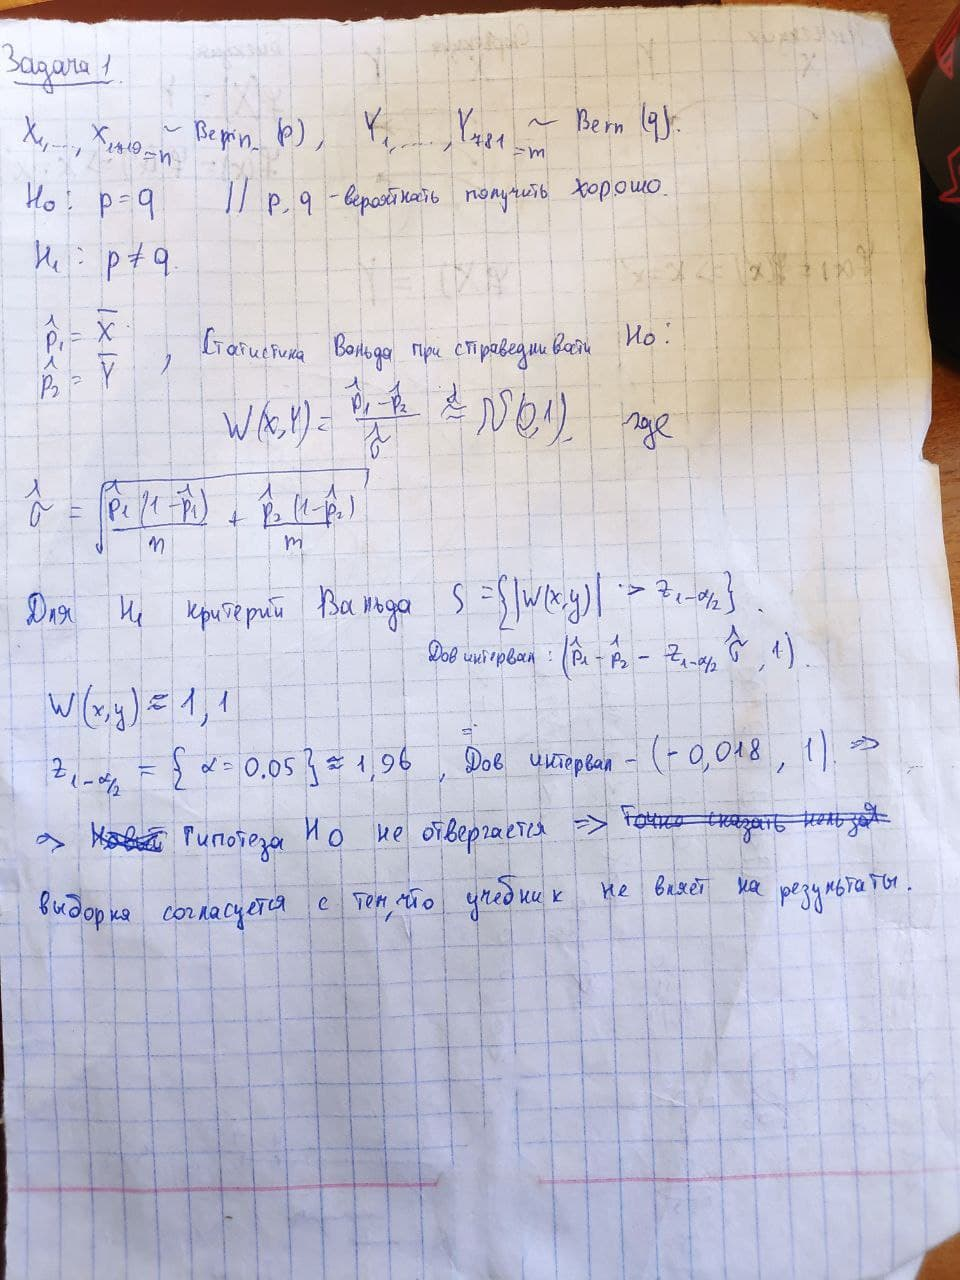

In [4]:
p1 = 853/1719
p2 = 369 / 781
n= 1719
m= 781

z = (p1-p2)/(np.sqrt(p1*(1-p1)/n + p2 * (1-p2)/m))

print("Статистика критерия: " + str(z))
print("z_(1-alpha/2): " + str(sps.norm().ppf(1-0.05/2)))

Статистика критерия: 1.101790604525022
z_(1-alpha/2): 1.959963984540054


## Задача 2: Белые мыши наносят ответный удар

Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [5]:
data = pd.read_csv("./Data_Cortex_Nuclear.csv")
data.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

Чтобы вспомнить, что это за данные, для начала выведем простые описательные статистики по вещественным параметрам.

In [6]:
data.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

Количество записей каждого класса:

In [7]:
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
t-SC-s    135
c-CS-s    135
c-SC-s    135
t-SC-m    135
t-CS-m    135
t-CS-s    105
Name: class, dtype: int64

Количество записей по генотипам:

In [8]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`. 

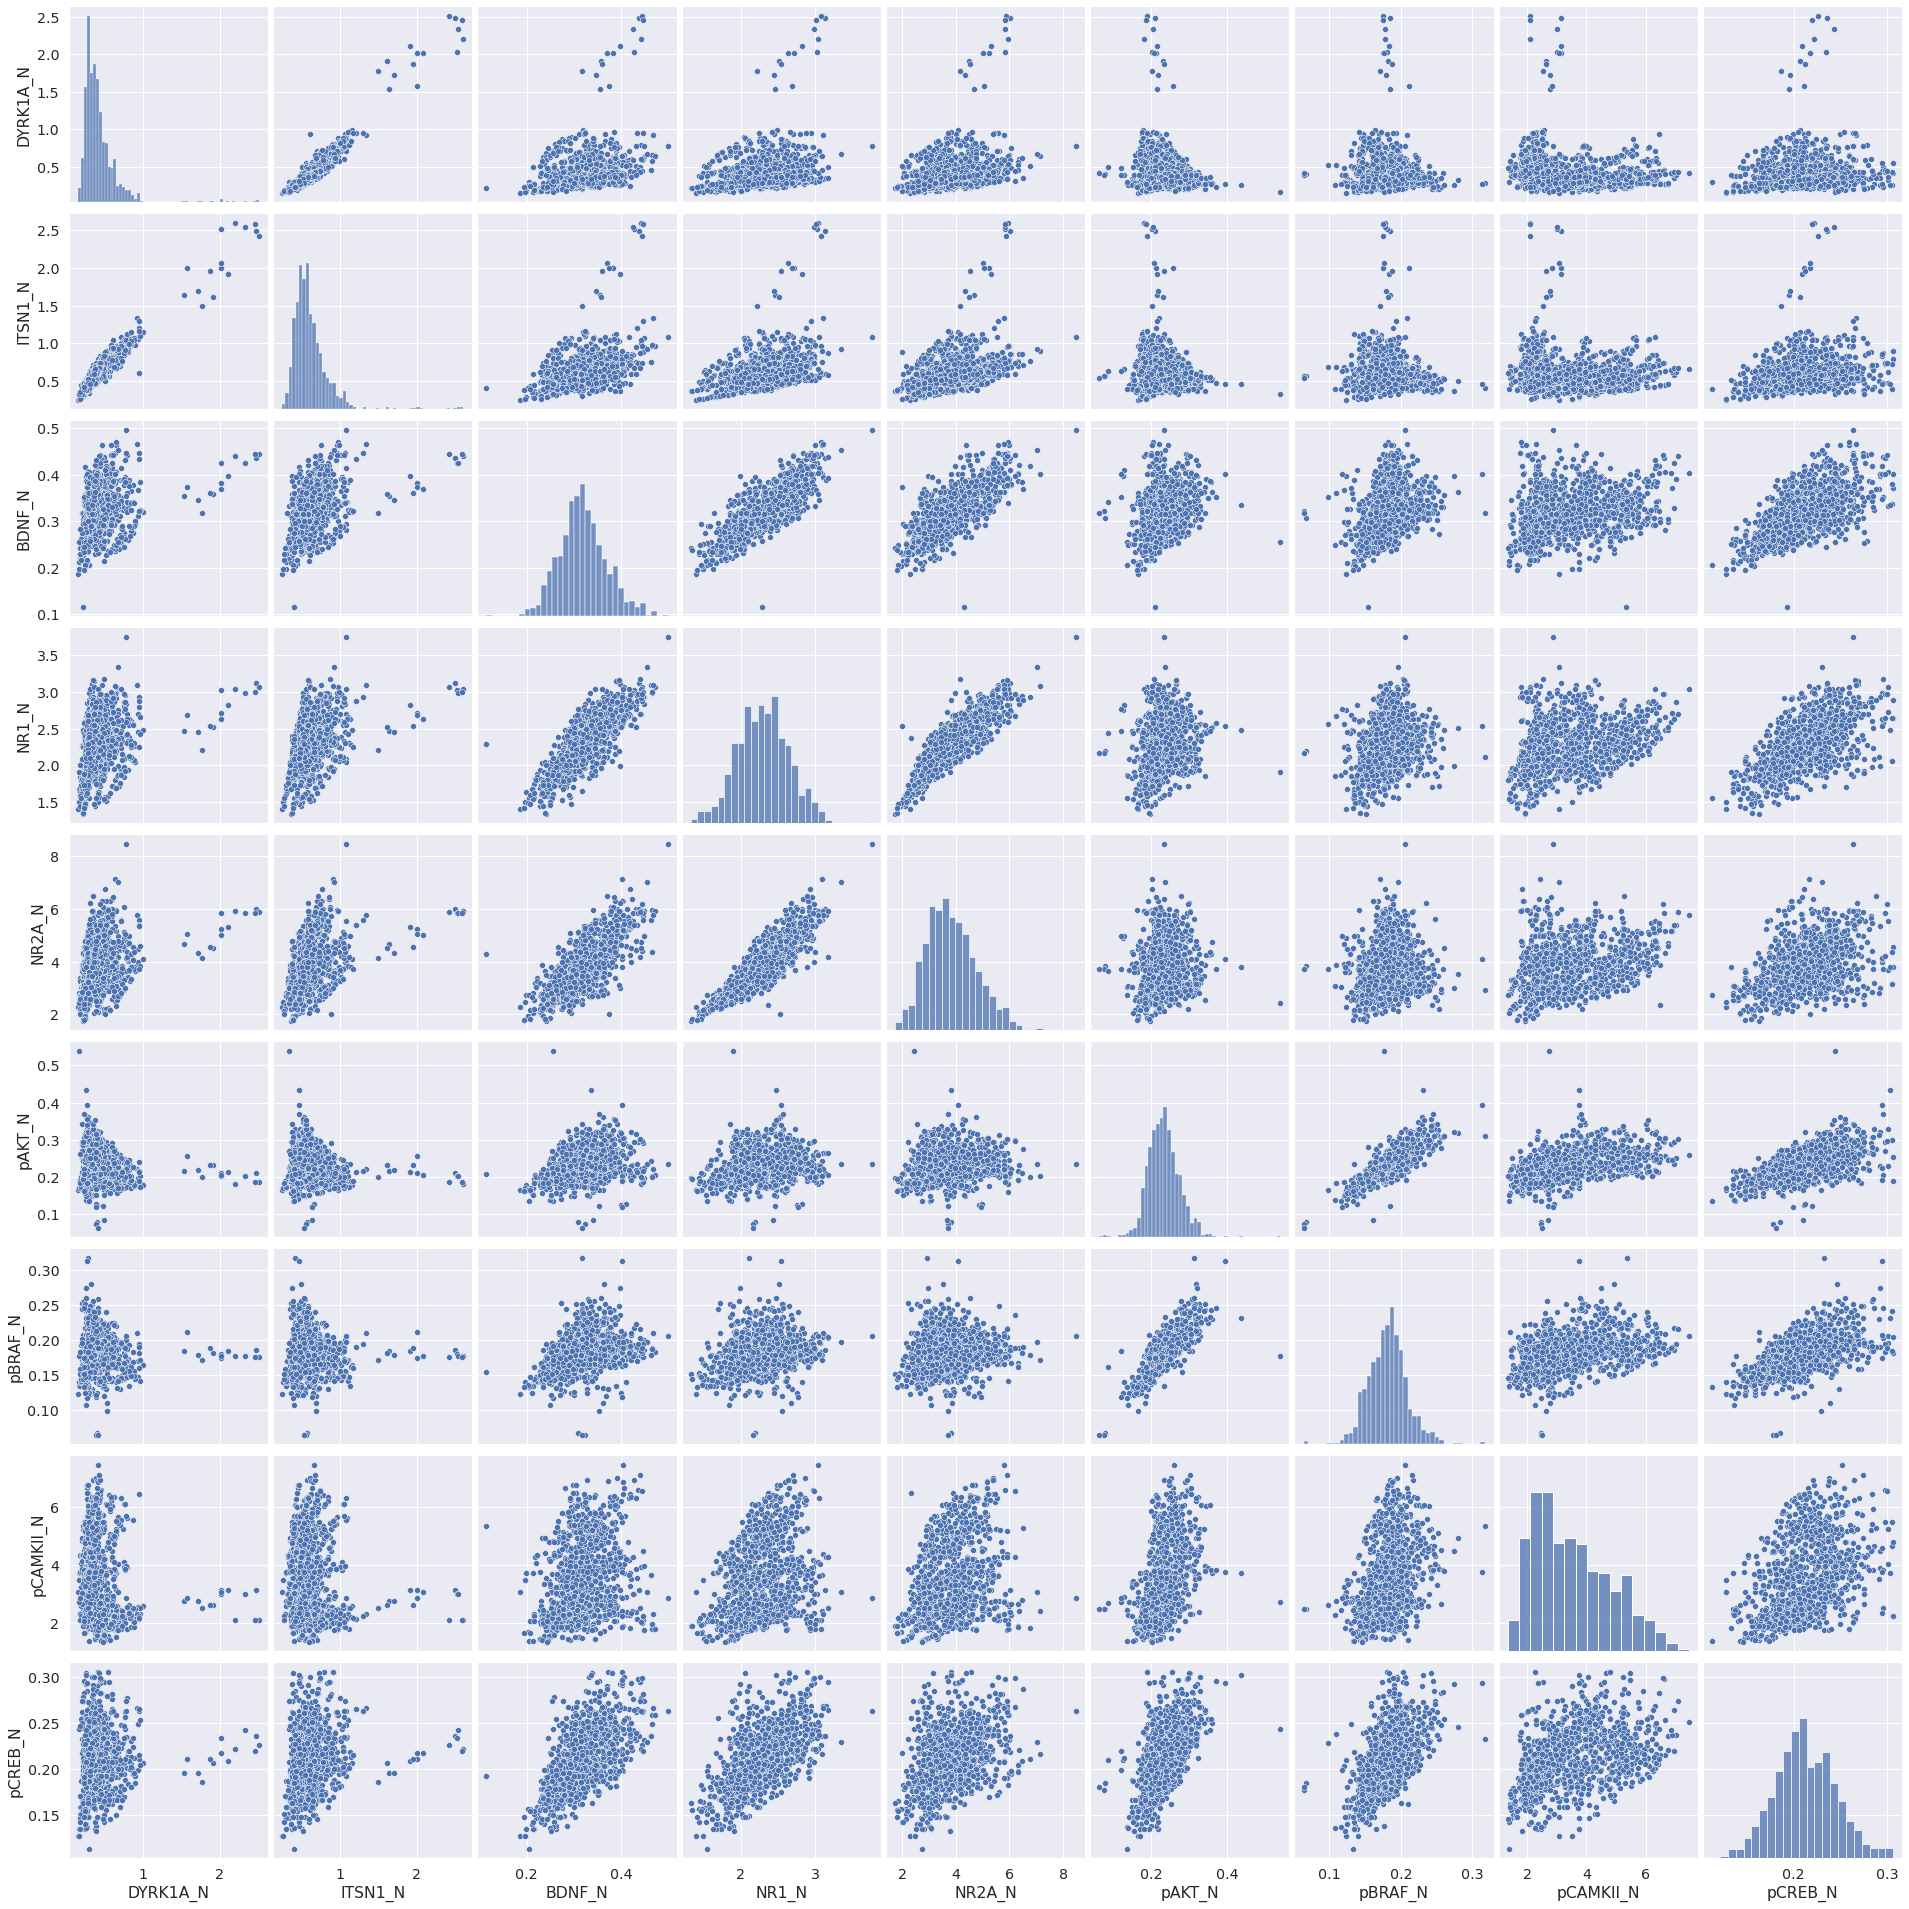

In [9]:
sns.pairplot(data.iloc[:, 1:10].dropna(), height=3)

При визуализации в двумерных проекциях можно также строить ядерные оценки плотности:

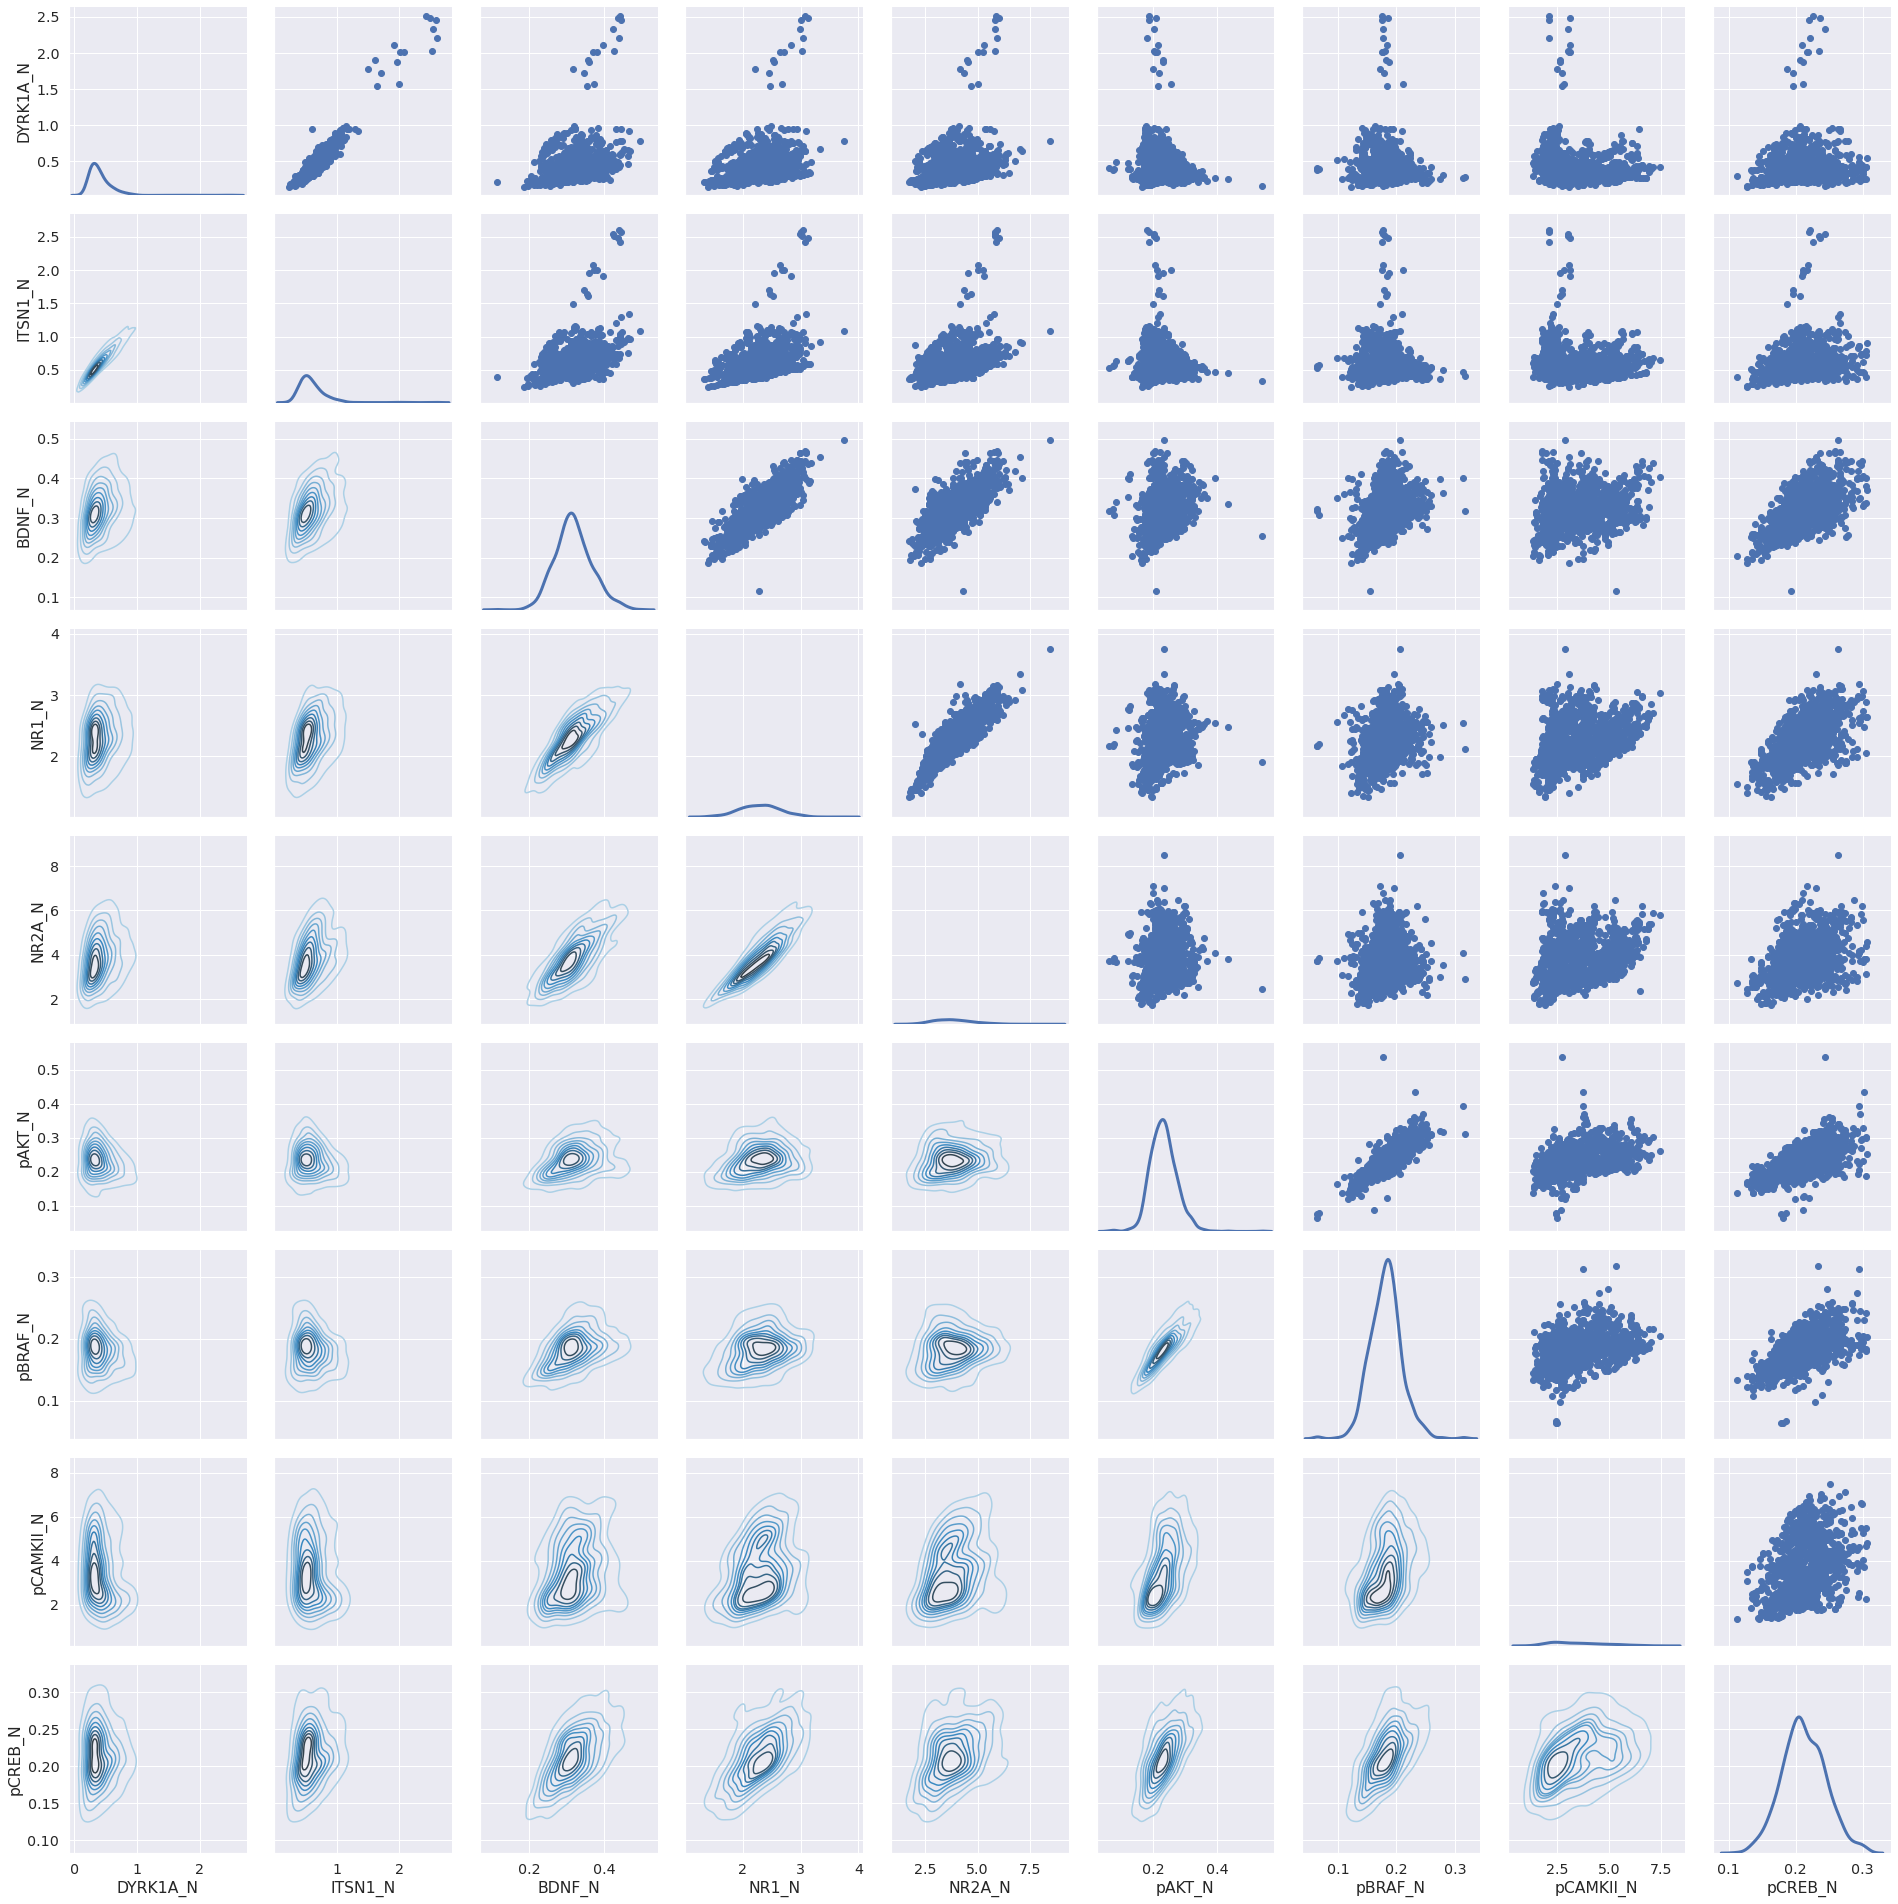

In [10]:
g = sns.PairGrid(data.iloc[:, 1:10].dropna(), height=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Посчитайте корреляционную матрицу признаков, соответствующих белкам, и выведите ее с помощью `sns.heatmap`, также выведя значения коэффициентов корреляции в ячейках матрицы.

а) для первых 15 признаков. Сравните корреляционные матрицы, полученные  с использованием трех известных вам коэффициентов корреляции.


б) для всех признаков с использованием коэффициента Спирмена.



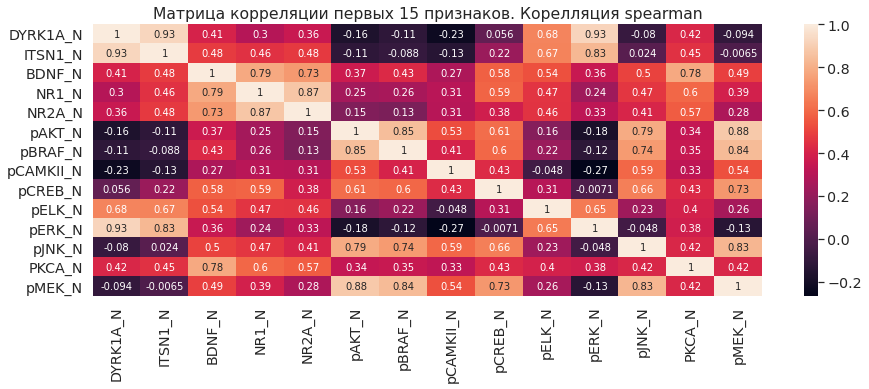

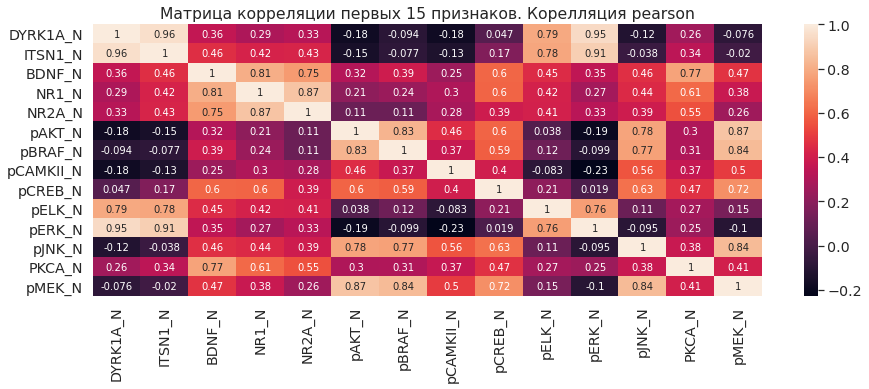

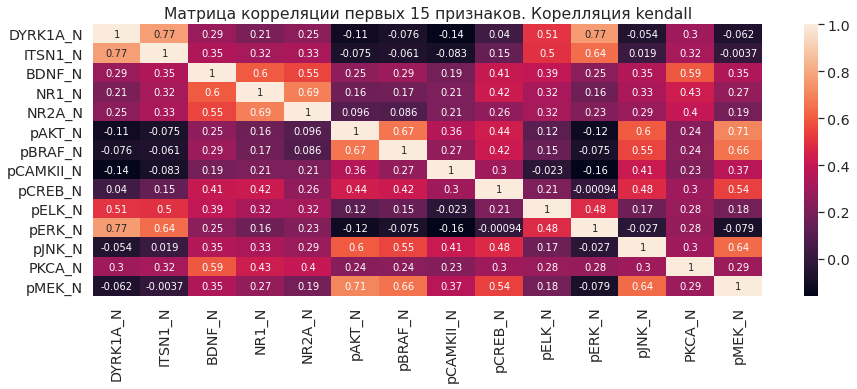

In [11]:
methods = ['spearman', 'pearson', 'kendall']

for method in methods:
    plt.figure(figsize=(15, 5))
    sns.heatmap(data.iloc[:, 1:15].dropna().corr(method=method, min_periods=1), annot = True)
    plt.title('Матрица корреляции первых 15 признаков. Корелляция ' + method)
    plt.show

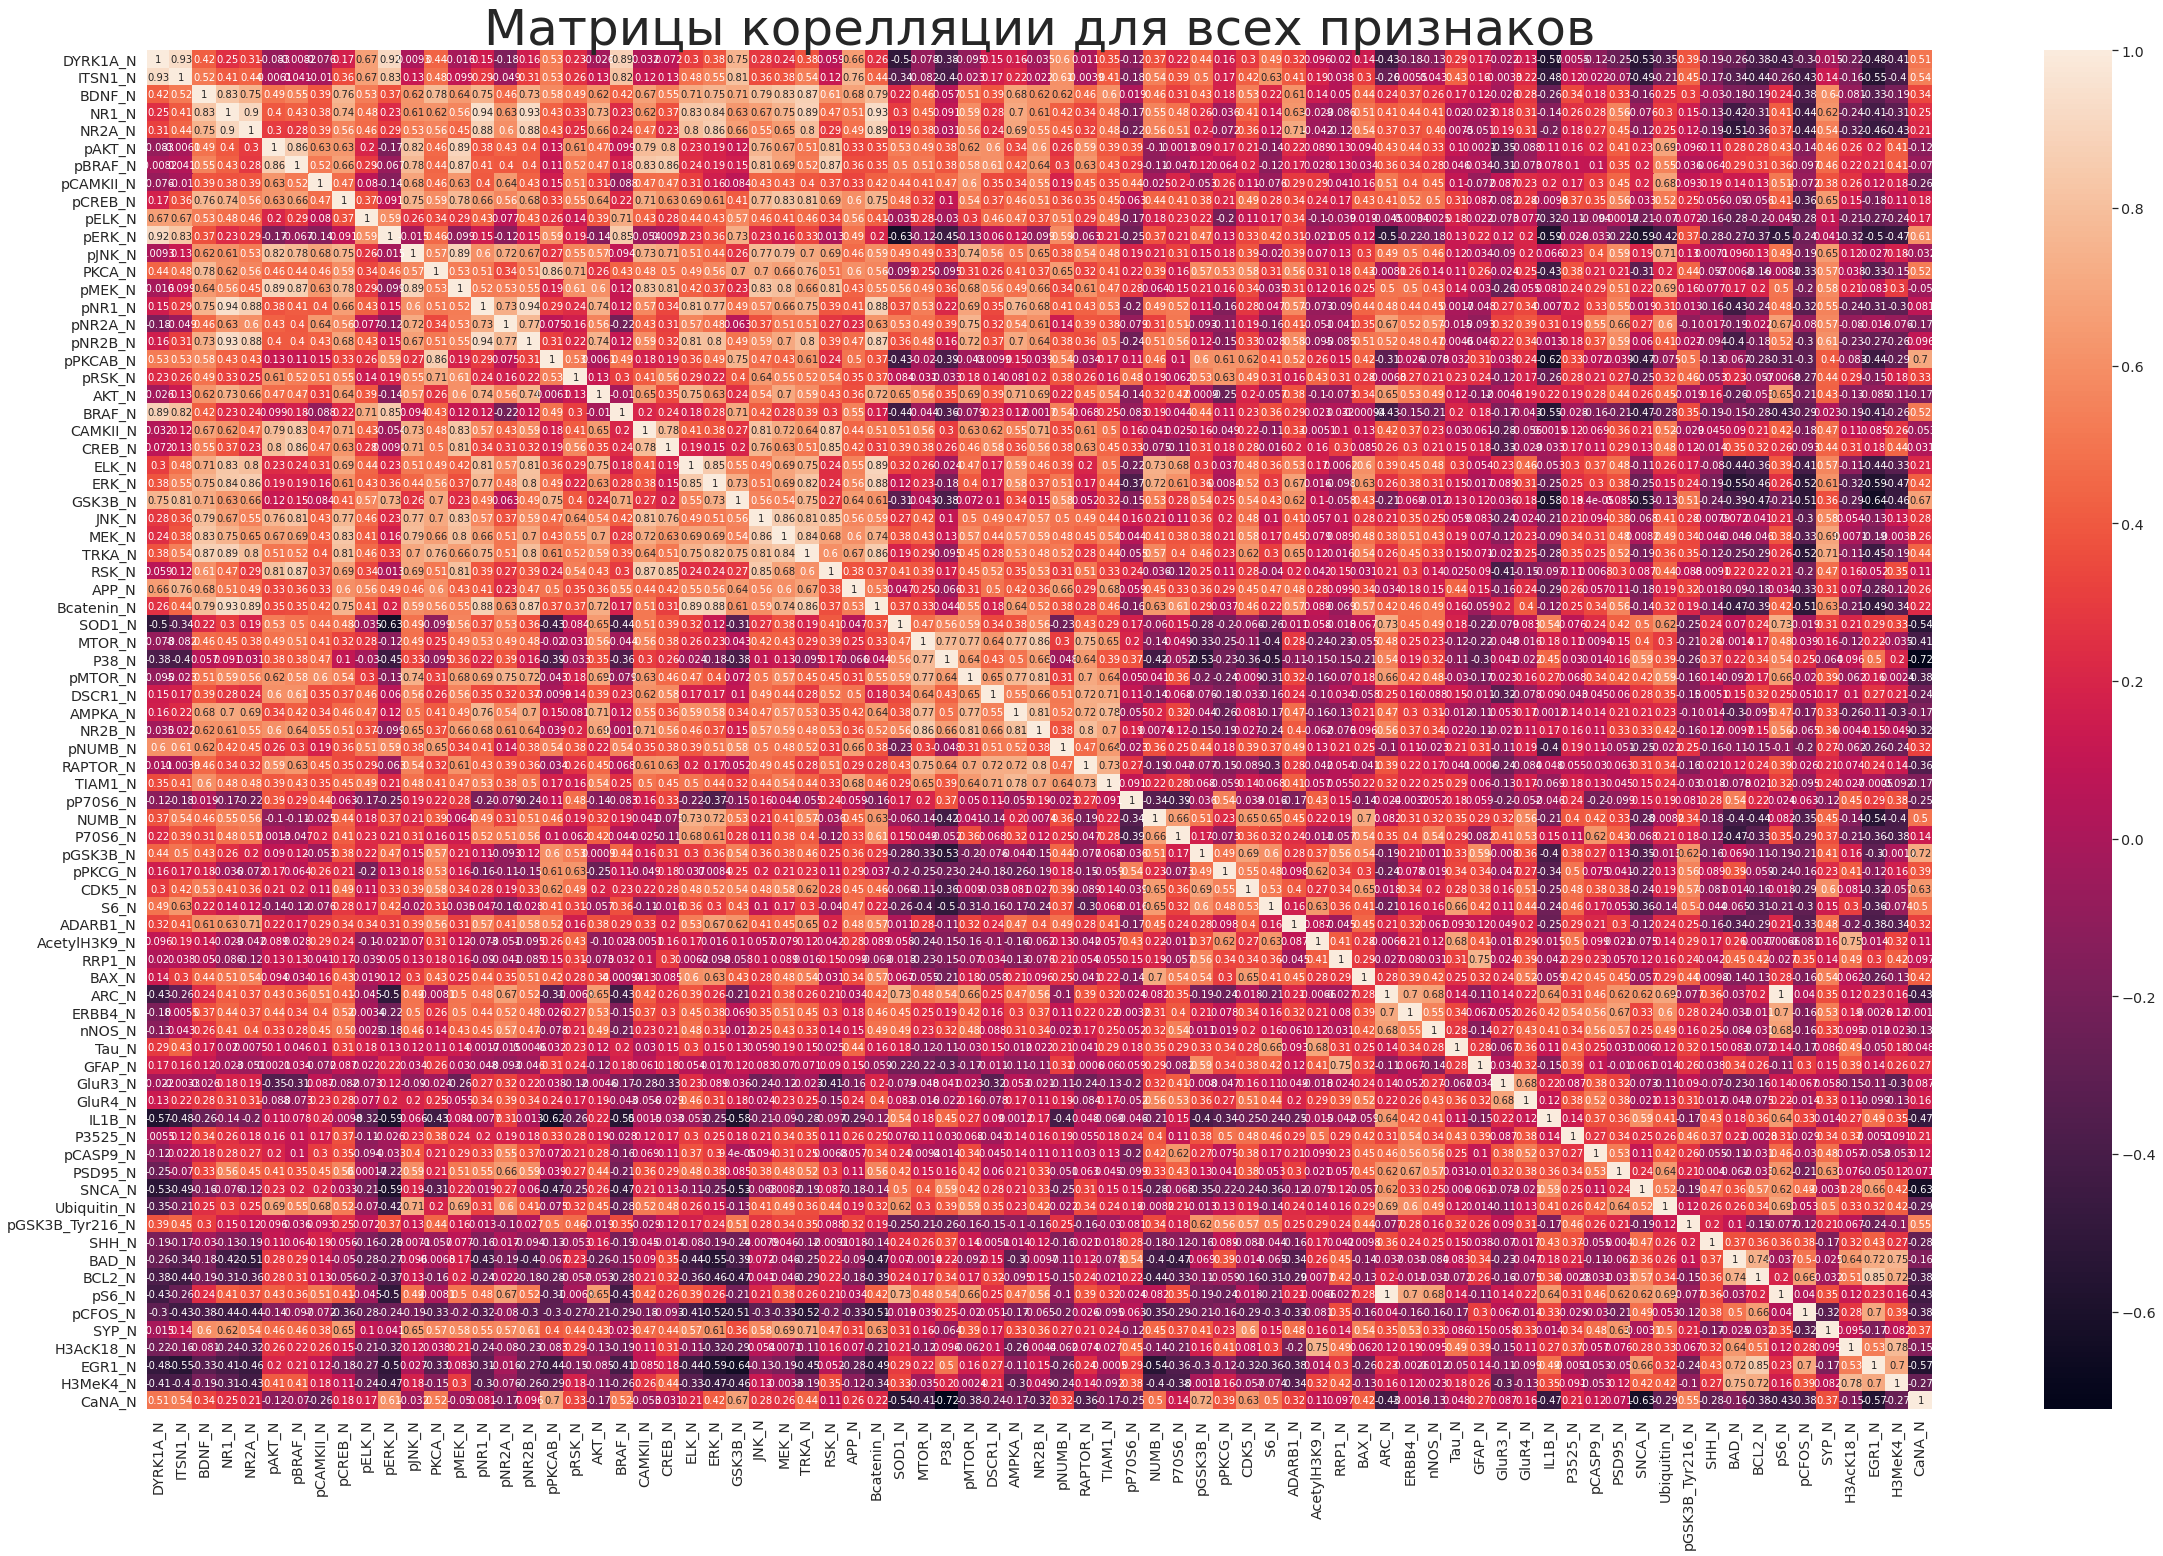

In [12]:
plt.figure(figsize=(40, 25))
sns.heatmap(data.iloc[:, 1:78].dropna().corr(method='spearman', min_periods=1), annot = True)
plt.title('Матрицы корелляции для всех признаков', fontsize=50)
plt.show()

**Вывод:** Большая часть признаков не коррилирует или слабо коррелирует между собой. Следовательно в дальнейшем нам нужно проверять каждый ген отдельно для нахождения каких-то оценок. 

Также можно заметить, что spearman находит больше всех остальных корреляций, а kendall -- меньше.

Далее мы будем исследовать зависимость уровня экспрессии от генотипа. У нас имеется всего два генотипа: обычные мыши и мыши с синдромом Дауна.



Визуализируйте двумерные проекции данных и ядерные оценки плотности с использованием `sns.PairGrid` отдельно по генотипам. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета.

In [13]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

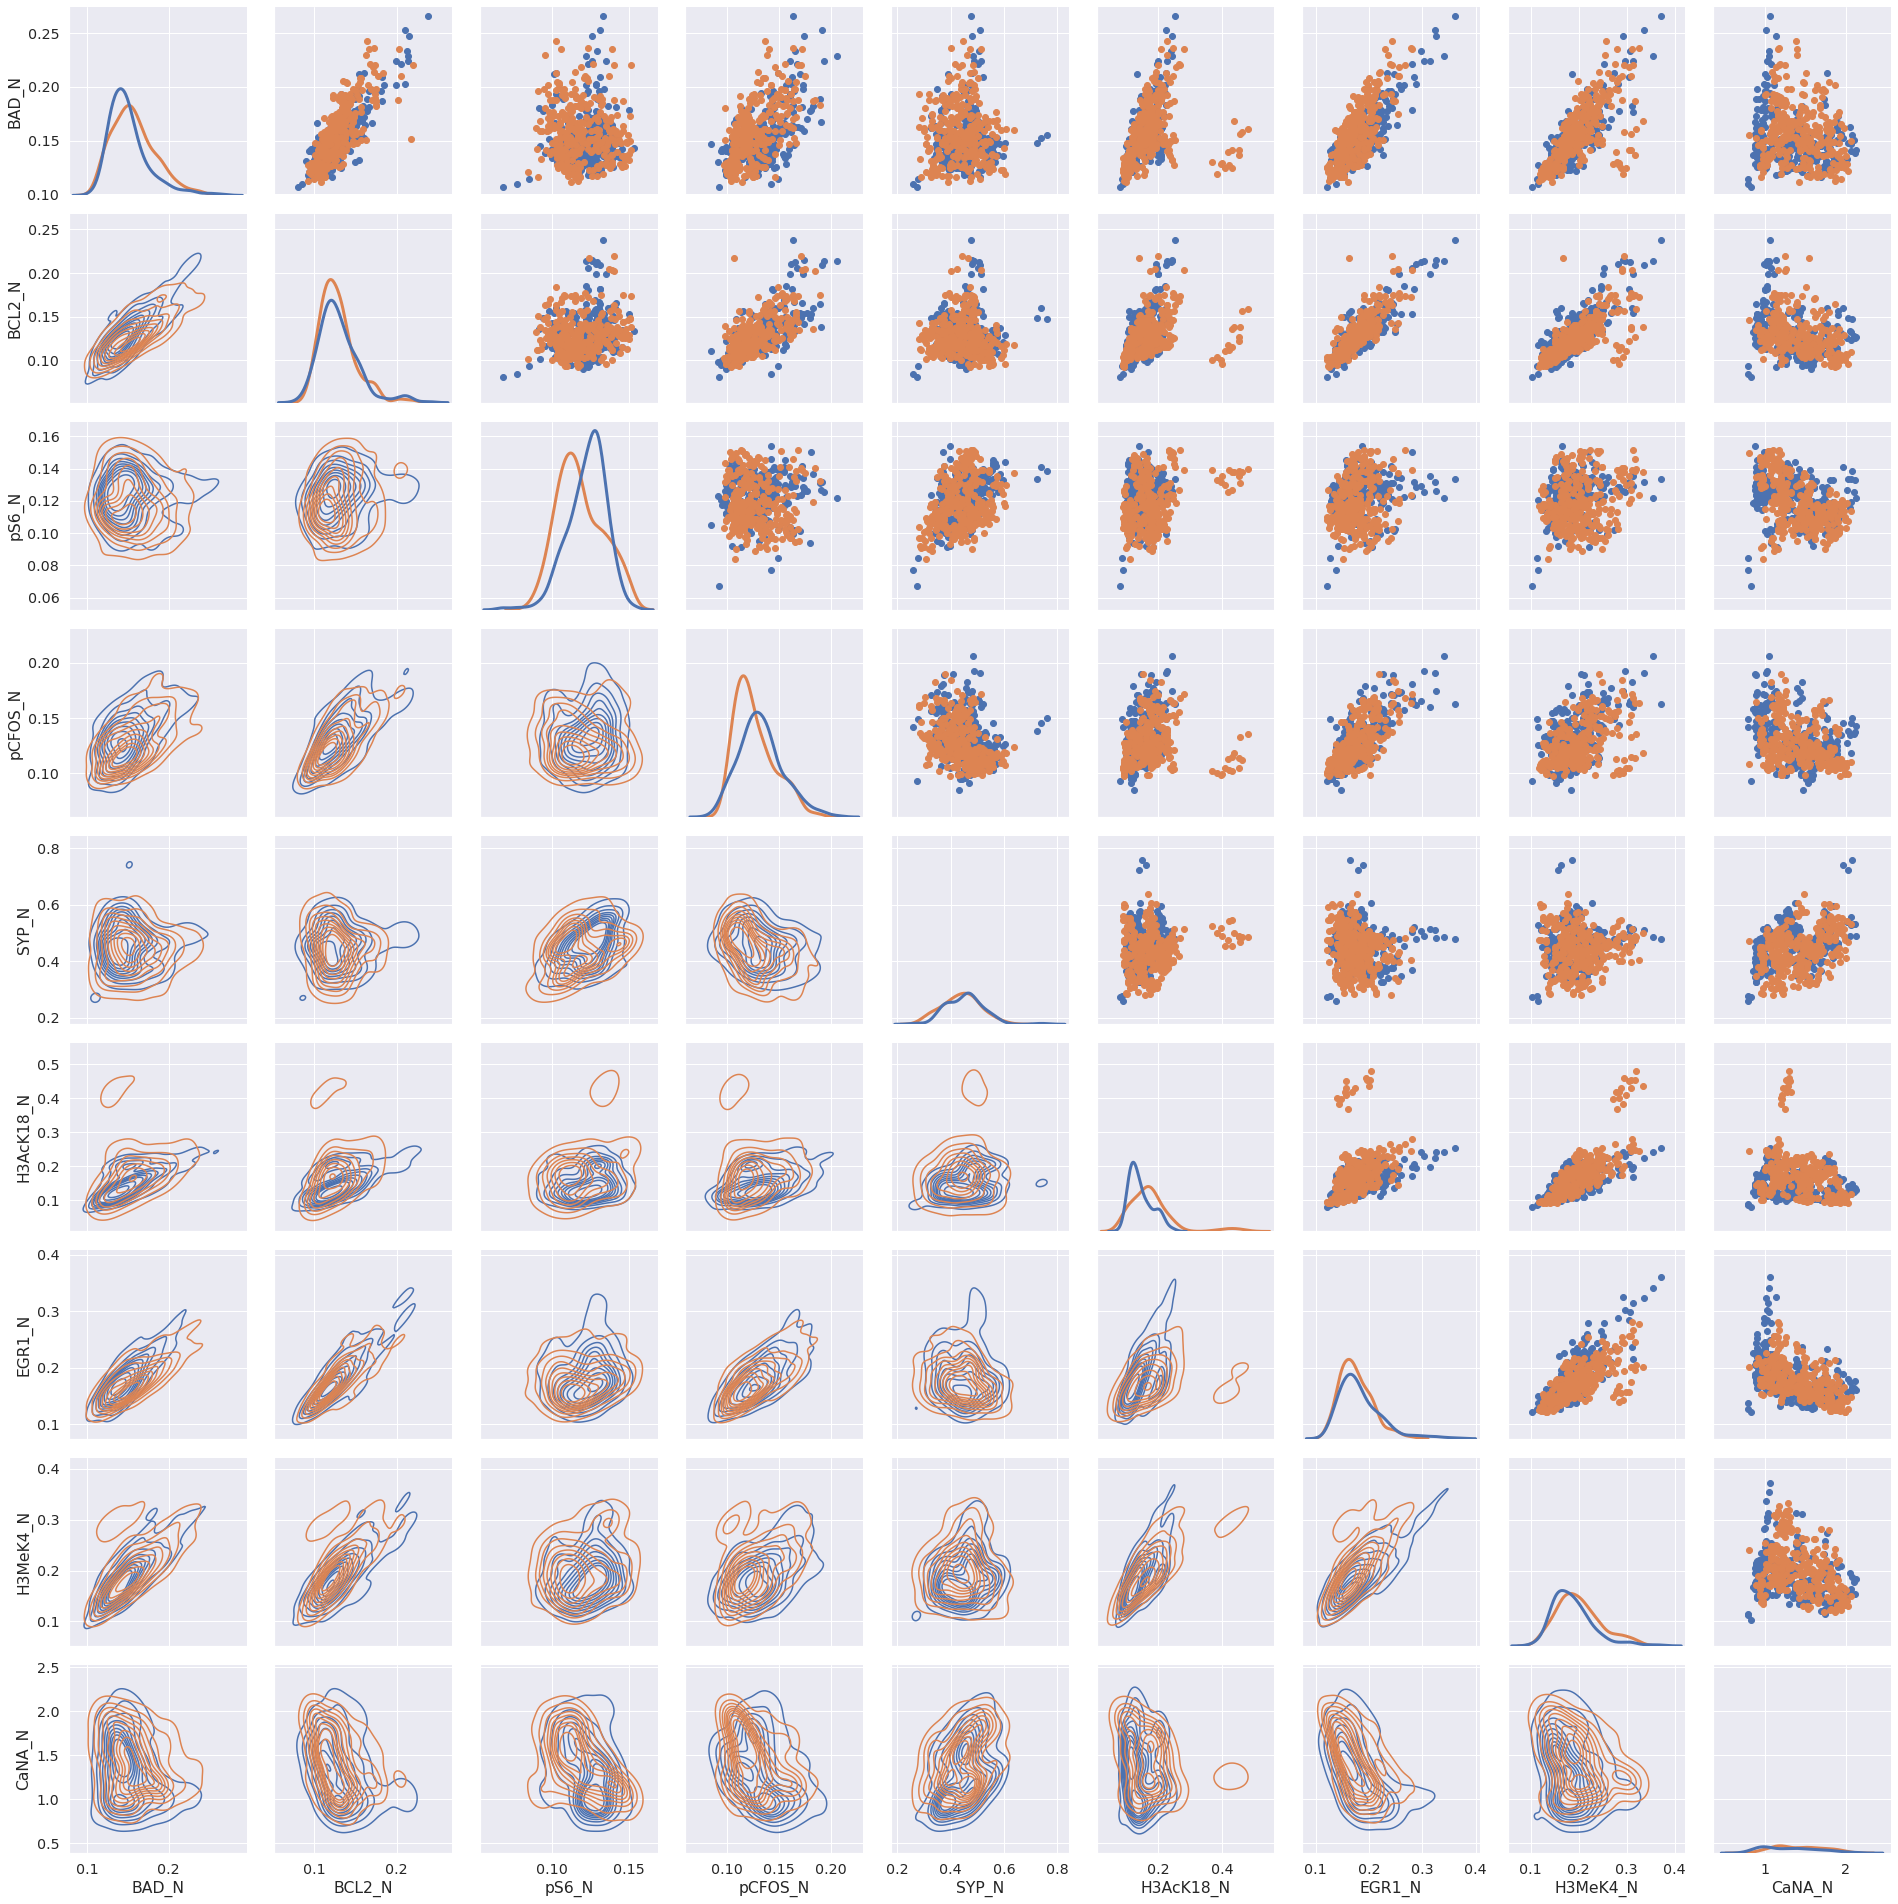

In [14]:
g = sns.PairGrid(data.iloc[:, 69:79].dropna(), height=3, hue='Genotype')
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#### 1. Корреляционный анализ

##### 1.1 Влияние генотипа на экспрессию DYRK1A_N 



С помощью ядерных оценок плотности посмотрите, как отличаются распределения `DYRK1A_N` для разных генотипов.

In [15]:
DYRK_data = data[['DYRK1A_N', 'Genotype']]

/home/havingfun/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/havingfun/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


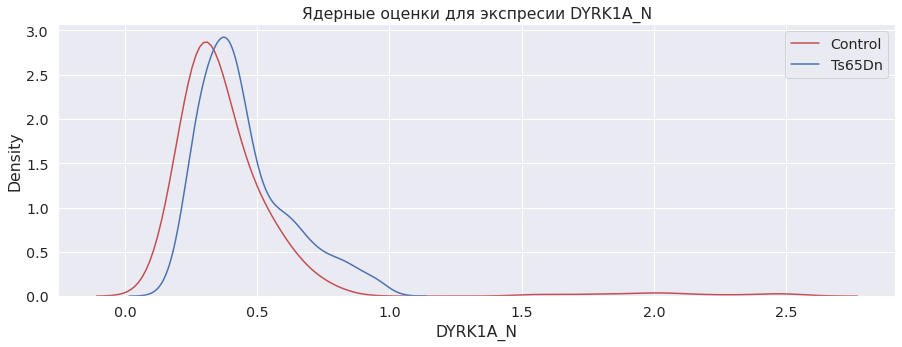

In [16]:
plt.figure(figsize=(15, 5))

sns.distplot(DYRK_data[(data['Genotype']== 'Control')]['DYRK1A_N'], label="Control", kde=True, hist=False, color="r")

sns.distplot(DYRK_data[(data['Genotype']== 'Ts65Dn')]['DYRK1A_N'], label="Ts65Dn", kde=True, hist=False, color="b")
plt.legend()
plt.title('Ядерные оценки для экспресии DYRK1A_N')
plt.show()

Избавьтесь от выбросов и `nan`. Разделите все значения на 5 корзин и составьте таблицу сопряженности. Можно воспользоваться функцией `np.histogram2d`. В итоге у вас должна получиться таблица размера $5\times2$.


In [17]:
#Избавляемя от nan
DYRK_data_new = DYRK_data.dropna()

#Избавляемся от выбросов
DYRK_data_new = DYRK_data_new[ (DYRK_data_new['DYRK1A_N'] <0.8) & (DYRK_data_new['DYRK1A_N'] >0.2) ]

In [18]:
x=np.array(DYRK_data_new['DYRK1A_N'])
y = np.array(DYRK_data_new['Genotype'] == 'Control')

table = np.histogram2d(x, y, bins = (5,2))[0]
table

array([[115., 250.],
       [193., 157.],
       [ 81.,  77.],
       [ 55.,  39.],
       [ 31.,  12.]])

Примените критерий хи-квадрат. Следите за условиями применимости критерия.

Проверим для начала, что критерий хи-квадрат можно использовать

In [19]:
print("$n_{\\bullet}_j$ ="+ str(table.sum(axis=0)))
print("$n_i_{\\bullet}$ ="+ str(table.sum(axis=1)))
print("n = " + str(y.shape[0]))

$n_{\bullet}_j$ =[475. 535.]
$n_i_{\bullet}$ =[365. 350. 158.  94.  43.]
n = 1010


Как видим $\text{n} >= 50$ и $\text{n}_{i\bullet} \text{n}_{\bullet j}/n < 5$ не более чем в 5% ячеек.

In [20]:
chi2, p_val = sps.chi2_contingency(table)[:2]
print("Статистика: " + str(chi2) +'\n')
print("P-value: " + str(p_val))

Статистика: 61.507089034850864

P-value: 1.398612894685986e-12


Сделайте выводы.

**Вывод** Гипотеза о равнораспределении отвергается, значит этот признак подхордит на роль признака, способного различать разные генотипы мышей.

##### 1.1 Влияние генотипа на экспрессию BDNF_N

Проведите те же исследования для признака  BDNF_N, начиная с ядерных оценок. Сделайте выводы.

Ядерные оценки

In [21]:
BDN_data = data[['BDNF_N', 'Genotype']]

/home/havingfun/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/havingfun/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


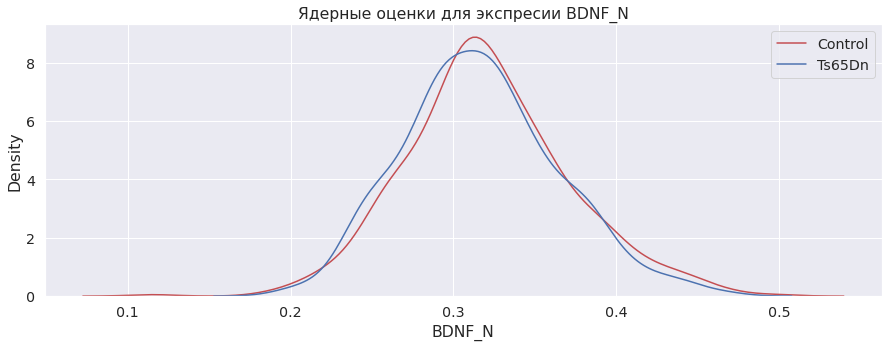

In [22]:
plt.figure(figsize=(15, 5))

sns.distplot(BDN_data[(data['Genotype']== 'Control')]['BDNF_N'], label="Control", kde=True, hist=False, color="r")

sns.distplot(BDN_data[(data['Genotype']== 'Ts65Dn')]['BDNF_N'], label="Ts65Dn", kde=True, hist=False, color="b")
plt.legend()
plt.title('Ядерные оценки для экспресии BDNF_N')
plt.show()

Таблица и критерий Хи-квадрат

In [23]:
#Избавляемя от nan
BDN_data_new = BDN_data.dropna()

#Избавляемся от выбросов
BDN_data_new = BDN_data_new[ (BDN_data_new['BDNF_N'] <0.45) & (BDN_data_new['BDNF_N'] >0.25) ]

In [24]:
x=np.array(BDN_data_new['BDNF_N'] )
y = np.array(BDN_data_new['Genotype'] == 'Control')

table = np.histogram2d(x, y, bins = (5,2))[0]
table

array([[ 99., 105.],
       [184., 203.],
       [108., 132.],
       [ 58.,  62.],
       [ 16.,  26.]])

In [25]:
print("$n_{\\bullet}_j$ ="+ str(table.sum(axis=0)))
print("$n_i_{\\bullet}$ ="+ str(table.sum(axis=1)))
print("n = " + str(y.shape[0]))

$n_{\bullet}_j$ =[465. 528.]
$n_i_{\bullet}$ =[204. 387. 240. 120.  42.]
n = 993


In [26]:
chi2, p_val = sps.chi2_contingency(table)[:2]
print("Статистика: " + str(chi2) +'\n')
print("P-value: " + str(p_val))

Статистика: 2.0347843101356573

P-value: 0.7293609858282485


**Вывод** Гипотеза о равнораспределённости не отвергается, следовательно ген неинформативный.

#### 2. Дисперсионный анализ

##### 2.1. Зависимость распределения DYRK1A_N от генотипа

Проверьте гипотезу о равенстве распределений с использованием критерия Уилкоксона-Манна-Уитни с использованием различных альтернатив.  В реальных исследованиях нужно использовать конкретную альтернативу. 

Сделайте выводы. Также поясните, почему в данной задаче можно использовать этот критерий.

In [27]:
def print_tests(sample_1, sample_2):
    print(sps.ranksums(sample_1, sample_2))
    print('two-sided:', sps.mannwhitneyu(sample_1, sample_2, alternative='two-sided'))
    print('less:     ', sps.mannwhitneyu(sample_1, sample_2, alternative='less'))
    print('greater:  ', sps.mannwhitneyu(sample_1, sample_2, alternative='greater'))


In [28]:
print_tests(DYRK_data[DYRK_data['Genotype'] == 'Control'].dropna()['DYRK1A_N'], 
            DYRK_data[DYRK_data['Genotype'] == 'Ts65Dn'].dropna()['DYRK1A_N'])

RanksumsResult(statistic=-8.394195609836844, pvalue=4.6909461401878865e-17)
two-sided: MannwhitneyuResult(statistic=101725.0, pvalue=4.6948652460094374e-17)
less:      MannwhitneyuResult(statistic=101725.0, pvalue=2.3474326230047187e-17)
greater:   MannwhitneyuResult(statistic=101725.0, pvalue=1.0)


**Вывод:** В этой задаче можно использовать этот критерий так как мыши с синдромом Дауна и обычные образуют независимые выборки.

Мы используем именно этот критерий потому, что он является непараметрическим. Ведь мы не знаем из какого распределения наша выборка.

Распределения отличаются для разных генотипов для гена DYRK1A_N. Этот ген всё ещё информативный.

Посчитайте реализацию оценки сдвига, связанную со статистикой Манна-Уитни, см. лекцию 10.

In [29]:
x = DYRK_data[DYRK_data['Genotype'] == 'Control'].dropna()['DYRK1A_N'].to_numpy()
y = DYRK_data[DYRK_data['Genotype'] == 'Ts65Dn'].dropna()['DYRK1A_N'].to_numpy()

n = x.shape[0]
m = y.shape[0]
w = np.empty((n, m))
for i in range(n):
    for j in range(m):
        w[i,j] = y[j] - x[i]

w = np.sort(w.flatten())
print("Оценка сдвига: " + str(np.median(w)))

Оценка сдвига: 0.0678743825


Посчитайте реализацию доверительного интервала величины сдвига. 


In [30]:
k_a = np.floor(n*m/2 - 1/2 - sps.norm().ppf(1-0.05) * np.sqrt(n*m * (n+m+1)/12))

print("Доверительный интервал уровня доверия 95%: (" + str(w[int(k_a)+1]) + ',' + str(w[n*m-int(k_a)]) +')')

Доверительный интервал уровня доверия 95%: (0.05490137500000003,0.08095821800000003)


##### 2.2. Зависимость распределения  BDNF_N от генотипа


Проверьте гипотезу с использованием критерия Уилкоксона-Манна-Уитни при различных альтернативах, посчитайте оценку сдвига и доверительный интервал. Сделайте выводы. 

In [31]:
print_tests(BDN_data[BDN_data['Genotype'] == 'Control'].dropna()['BDNF_N'],
           BDN_data[BDN_data['Genotype'] == 'Ts65Dn'].dropna()['BDNF_N'])

RanksumsResult(statistic=1.5057345971163962, pvalue=0.132135318782809)
two-sided: MannwhitneyuResult(statistic=152167.0, pvalue=0.13216052210535206)
less:      MannwhitneyuResult(statistic=152167.0, pvalue=0.9339449404079772)
greater:   MannwhitneyuResult(statistic=152167.0, pvalue=0.06608026105267603)


In [32]:
x = BDN_data[BDN_data['Genotype'] == 'Control'].dropna()['BDNF_N'].to_numpy()
y = BDN_data[BDN_data['Genotype'] == 'Ts65Dn'].dropna()['BDNF_N'].to_numpy()

n = x.shape[0]
m = y.shape[0]
w = np.empty((n, m))
for i in range(n):
    for j in range(m):
        w[i,j] = y[j] - x[i]

w = np.sort(w.flatten())
print("Оценка сдвига: " + str(np.median(w)))

Оценка сдвига: -0.004431168499999999


In [33]:
k_a = np.floor(n*m/2 - 1/2 - sps.norm().ppf(1-0.05) * np.sqrt(n*m * (n+m+1)/12))

print("Доверительный интервал уровня доверия 95%: (" + str(w[int(k_a)+1]) + ',' + str(w[n*m-int(k_a)]) +')')

Доверительный интервал уровня доверия 95%: (-0.009274271999999972,0.0004146500000000164)


**Вывод**
Распределение для разных генотипов одинаковое для гена BDNF_N. Это второй раз подтверждает, что ген неинформативный.

Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?

Если 0 содержится в доверительном интервале, значит функции распределения не отличаются и гипотеза не отвергается, если 0 не лежит в доверительном интервале параметра сдвига, то равенство должно отвергаться. 

Проверьте выборку на нормальность с помощью критерия Шапиро-Уилка и QQ-plot. Можно ли применять методы, (не)устойчивые к отклонениям от нормальности?

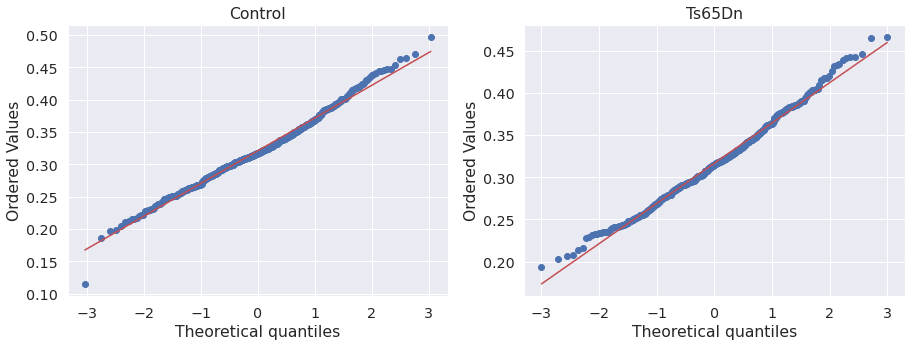

In [34]:
## Проверка с помощью QQ-plot
plt.figure(figsize=(15, 5))

Control_sam_BDN = BDN_data[BDN_data['Genotype'] == 'Control'].dropna()['BDNF_N'].to_numpy()
Ts_sam_BDN = BDN_data[BDN_data['Genotype'] == 'Ts65Dn'].dropna()['BDNF_N'].to_numpy()

ax = plt.subplot(1, 2, 1)

sps.probplot(Control_sam_BDN, plot=ax)
ax.set_title('Control')

ax1 = plt.subplot(1, 2, 2)

sps.probplot(Ts_sam_BDN, plot=ax1)
ax1.set_title('Ts65Dn')

plt.show()

In [35]:
## Проверка с помощью Шапиро-Уилка

stat_contr, p_val_contr = sps.shapiro(Control_sam_BDN)
stat_Ts, p_val_Ts = sps.shapiro(Ts_sam_BDN)

print("Cкорректированные p-value для генотипа Control и Ts65Dn соответственно")
multipletests([p_val_contr,p_val_Ts], alpha=0.05, method='holm-sidak')[1]

Cкорректированные p-value для генотипа Control и Ts65Dn соответственно


array([0.00304156, 0.00618444])

Нормальность отвергается.

Какой критерий можно применять в случае нормальных выборок и одинаковой дисперсии? Можно ли его применять для проверке гипотез о признаках DYRK1A_N, BDNF_N? Примените этот критерий для признака BDNF_N, сделайте выводы.

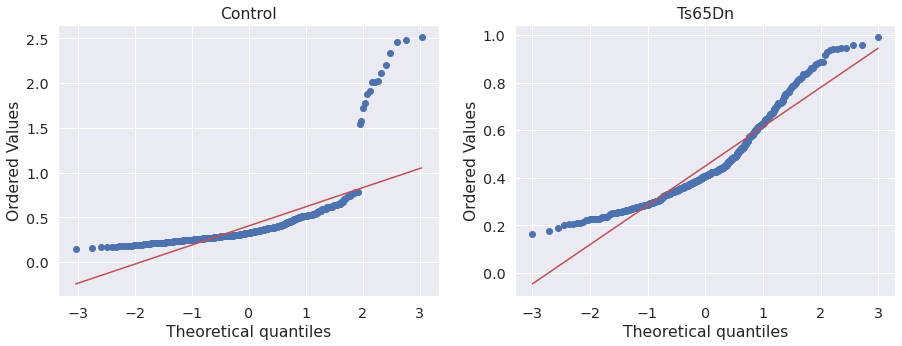

In [36]:
#Проверка нормальность с помощью QQ-plot признака DYRK1A_N
plt.figure(figsize=(15, 5))

Control_sam_DYRK = DYRK_data[DYRK_data['Genotype'] == 'Control'].dropna()['DYRK1A_N'].to_numpy()
Ts_sam_DYRK = DYRK_data[DYRK_data['Genotype'] == 'Ts65Dn'].dropna()['DYRK1A_N'].to_numpy()

ax = plt.subplot(1, 2, 1)

sps.probplot(Control_sam_DYRK, plot=ax)
ax.set_title('Control')

ax1 = plt.subplot(1, 2, 2)

sps.probplot(Ts_sam_DYRK, plot=ax1)
ax1.set_title('Ts65Dn')

plt.show()

In [37]:
# Применение двухвыборочного T-критерий Стьюдента
sps.ttest_ind(Control_sam_BDN, Ts_sam_BDN, equal_var=True)

Ttest_indResult(statistic=1.440470979622491, pvalue=0.15002536864087548)

**Вывод** Не знаю, что показывает этот критерий если нормальность выборки отверглась в прошлом пункте..

Но да, он сработал правильно и не отверг гипотезу о равенстве матожей.

#### 3. Зависимость уровня экспрессии от генотипа для всех исследуемых белков

Задача заключается в том, чтобы среди всех белков отобрать для дальнейшего более подробного анализа те, по которым уровень экспрессии гена отличается по двум генотипам. Для решения задачи проверьте гипотезы об однородности по генотипам для каждого белка с использованием критерия Уилкоксона-Манна-Уитни.

Почему в данном случае стоит использовать его, а не критерий Стьюдента?

Не забудьте о множественной проверке гипотез. Заметим, что цель исследований &mdash; **отбор** признаков для дальнейшего анализа. Какой метод стоит применять в данном случае? *Обратите внимание на то, как устроены данные.*

Распечатайте результаты МПГ для всех признаков. Сделайте вывод.

**Ответы на вопросы**: Критерий Стьюдента неудобен, т.к. для каждого распределения нужно находить область в которой он выполняется. С этой точки зрения критерий Уилкоксона-Манна-Уитни много удобнее и менее затратнее по вычислениям(если определять область естественно для Стьюдента).

Для отбора будем пользоваться методами контроля FDR, ибо они больше отвергают. Так как выборки независимые, то возьмем самый мощный: Бенджамини-Иекутиели.

In [38]:
p_vals = []
features = data.describe().columns

for item in features:
    sample = data[[item, 'Genotype' ]].dropna()
    control_sampl = sample[sample['Genotype'] == 'Control'][item]
    Ts56Dn_sampl = sample[sample['Genotype'] == 'Ts65Dn'][item]
    p_vals.append(sps.mannwhitneyu(control_sampl, Ts56Dn_sampl, alternative='two-sided')[1])
    

df_res = pd.DataFrame()
df_res['Отвергнута'], df_res['Скорректированные p-value'] =  multipletests(p_vals, alpha=0.1, method='fdr_by')[:2]

for i in range(len(features)):
    df_res = df_res.rename(index={i: features[i]})

df_res.T

DYRK1A_N ITSN1_N    BDNF_N     NR1_N    NR2A_N  \
Отвергнута                    True    True     False      True      True   
Скорректированные p-value      0.0     0.0  0.911709  0.027056  0.000033   

                             pAKT_N pBRAF_N pCAMKII_N pCREB_N    pELK_N  ...  \
Отвергнута                    False   False     False    True      True  ...   
Скорректированные p-value  0.437852     1.0       1.0     0.0  0.023606  ...   

                           SHH_N     BAD_N BCL2_N     pS6_N   pCFOS_N SYP_N  \
Отвергнута                 False     False  False      True     False  True   
Скорректированные p-value    1.0  0.573382    1.0  0.000001  0.153088   0.0   

                          H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
Отвергнута                     True      True      True     False  
Скорректированные p-value       0.0  0.000208  0.001292  0.452517  

[2 rows x 77 columns]

Для каждого признака посчитайте оценку сдвига. Сделайте вывод.

In [39]:
n = x.shape[0]
m = y.shape[0]
w = np.empty((n, m))
for i in range(n):
    for j in range(m):
        w[i,j] = y[j] - x[i]

theta =[]
        
for item in features:
    sample = data[[item, 'Genotype' ]].dropna()
    x = sample[sample['Genotype'] == 'Control'][item].to_numpy()
    y = sample[sample['Genotype'] == 'Ts65Dn'][item].to_numpy()
    n = x.shape[0]
    m = y.shape[0]
    w = np.empty((n, m))
    for i in range(n):
        for j in range(m):
            w[i,j] = y[j] - x[i]    
    w = np.sort(w.flatten())
    theta.append(np.median(w))
    
df_res['Оценка сдвига'] = theta
df_res.T

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N  \
Отвергнута                     True      True     False      True      True   
Скорректированные p-value       0.0       0.0  0.911709  0.027056  0.000033   
Оценка сдвига              0.067874  0.114045 -0.004431 -0.065386 -0.269391   

                             pAKT_N   pBRAF_N pCAMKII_N   pCREB_N    pELK_N  \
Отвергнута                    False     False     False      True      True   
Скорректированные p-value  0.437852       1.0       1.0       0.0  0.023606   
Оценка сдвига              0.004657  0.000275 -0.054376  0.012035  0.052012   

                           ...     SHH_N     BAD_N    BCL2_N     pS6_N  \
Отвергнута                 ...     False     False     False      True   
Скорректированные p-value  ...       1.0  0.573382       1.0  0.000001   
Оценка сдвига              ... -0.000736  0.003317 -0.002044 -0.005379   

                            pCFOS_N     SYP_N H3AcK18_N    EGR1_N  H3MeK4_N  \
Отвергнута                    False      True      True      True      True   
Скорректированные p-value  0.153088       0.0       0.0  0.000208  0.001292   
Оценка сдвига             -0.003173 -0.031573   0.01928 -0.010286  0.013544   

                             CaNA_N  
Отвергнута                    False  
Скорректированные p-value  0.452517  
Оценка сдвига              0.038242  

[3 rows x 77 columns]

**Вывод** Маленькие оценки сдвига соответствуют тем белкам, для которых не отвергается гипотеза однородности по генотипам. Распределения несильно сдвинуты друг относительно друга, а значит они будут однороднородны.

### Задача 3
Для анализа будем использоваться датасет <a href="https://ru.wikipedia.org/wiki/Экспрессия_генов">экспресии генов</a> в нормальных тканях и в <a href="https://ru.wikipedia.org/wiki/Карцинома">карциномах</a>, полученные c помощью нуклеотидных [микрочипов](https://ru.wikipedia.org/wiki/%D0%94%D0%9D%D0%9A-%D0%BC%D0%B8%D0%BA%D1%80%D0%BE%D1%87%D0%B8%D0%BF). Данные опубликованы в работе `Notterman, et al, Cancer Research vol. 61: 2001`.
Всего доступна информация о 18 опухолевых образцах и о соответсвующих им здоровых тканях.

Для лучшего понимания задачи можно почитать следующие статьи:
* https://fb.ru/article/256575/ekspressiya-genov---eto-chto-takoe-opredelenie-ponyatiya
* https://ru.qwe.wiki/wiki/Gene_expression

Загрузим данные

In [8]:
! wget http://genomics-pubs.princeton.edu/oncology/Data/CarcinomaNormalDatasetCancerResearchText.zip
! unzip CarcinomaNormalDatasetCancerResearchText.zip

--2021-05-10 09:43:46--  http://genomics-pubs.princeton.edu/oncology/Data/CarcinomaNormalDatasetCancerResearchText.zip
Resolving genomics-pubs.princeton.edu (genomics-pubs.princeton.edu)... 128.112.102.64
Connecting to genomics-pubs.princeton.edu (genomics-pubs.princeton.edu)|128.112.102.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 549752 (537K) [application/zip]
Saving to: ‘CarcinomaNormalDatasetCancerResearchText.zip’

CarcinomaNormalData 100%[===================>] 536,87K   437KB/s    in 1,2s    

2021-05-10 09:43:47 (437 KB/s) - ‘CarcinomaNormalDatasetCancerResearchText.zip’ saved [549752/549752]

Archive:  CarcinomaNormalDatasetCancerResearchText.zip
replace CarcinomaNormalDatasetCancerResearch.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Загрузим данные в `pandas` и посмотрим на них:

In [40]:
data = pd.read_table(
    "CarcinomaNormalDatasetCancerResearch.txt", 
    skiprows=range(1,8), index_col=0, usecols=range(39)
)
data = data.drop(['Sample'], axis=1)

data.head()

Description  Tumor 27  \
Accession Number                                                                
X53416            Human mRNA for actin-binding protein (filamin)...      70.0   
M83670             "Human carbonic anhydrase IV mRNA, complete cds"     -81.0   
X90908                    H.sapiens mRNA for I-15P (I-BABP) protein      25.0   
M97496                   "Homo sapiens guanylin mRNA, complete cds"      10.0   
X90908                    H.sapiens mRNA for I-15P (I-BABP) protein      22.0   

                  Tumor 29  Tumor 34  Tumor 28  Tumor 35  Tumor 8  Tumor 3  \
Accession Number                                                             
X53416               108.0      75.0     871.0     -92.0     21.0    225.0   
M83670               -30.0      -1.0       4.0     -34.0    -13.0    118.0   
X90908                -7.0       5.0      14.0      14.0      5.0     -5.0   
M97496                60.0      48.0      78.0      19.0     11.0    175.0   
X90908                 0.0       6.0      -6.0      11.0    -18.0    -40.0   

                  Tumor 9  Tumor 4  ...  Normal 4  Normal 32  Normal 39  \
Accession Number                    ...                                   
X53416             -346.0   -378.0  ...     632.0     1412.0     1122.0   
M83670              -35.0     31.0  ...     185.0      288.0      416.0   
X90908               37.0    -29.0  ...    4723.0      -21.0       -7.0   
M97496               42.0    105.0  ...    1107.0      731.0     1559.0   
X90908               39.0    -54.0  ...    3344.0        8.0        5.0   

                  Normal 10  Normal 33  Normal 5  Normal 11  Normal 6  \
Accession Number                                                        
X53416                644.0     1760.0     488.0      164.0    1282.0   
M83670                625.0      320.0     564.0      330.0     116.0   
X90908                -28.0       -8.0     -29.0      -13.0      -4.0   
M97496               1762.0      917.0    1303.0      721.0     542.0   
X90908                 -7.0       -2.0      -9.0       12.0       0.0   

                  Normal 12  Normal 40  
Accession Number                        
X53416                 68.0      928.0  
M83670                718.0      332.0  
X90908                -50.0        4.0  
M97496               1816.0      412.0  
X90908                -28.0        0.0  

[5 rows x 37 columns]

Посмотрим также на хвост данных

In [3]:
data.tail()

Description  Tumor 27  \
Accession Number                                                                
X54489            Human gene for melanoma growth stimulatory act...     123.0   
T55008            yb45h04.s1 Homo sapiens cDNA clone 74167 3' si...       2.0   
M10065            "Human apolipoprotein E (epsilon-4 allele) gen...      19.0   
NaN                                                             NaN       NaN   
NaN                                                             NaN       NaN   

                  Tumor 29  Tumor 34  Tumor 28  Tumor 35  Tumor 8  Tumor 3  \
Accession Number                                                             
X54489               271.0     127.0      59.0     265.0      3.0    110.0   
T55008                -1.0       7.0       3.0      -2.0      9.0      7.0   
M10065               -51.0     192.0     367.0     126.0    145.0    -14.0   
NaN                    NaN       NaN       NaN       NaN      NaN      NaN   
NaN                    NaN       NaN       NaN       NaN      NaN      NaN   

                  Tumor 9  Tumor 4  ...  Normal 4  Normal 32  Normal 39  \
Accession Number                    ...                                   
X54489               30.0     97.0  ...       3.0        8.0       16.0   
T55008               -5.0      0.0  ...      -4.0       -5.0      -17.0   
M10065              -53.0    -51.0  ...    -103.0       39.0      -10.0   
NaN                   NaN      NaN  ...       NaN        NaN        NaN   
NaN                   NaN      NaN  ...       NaN        NaN        NaN   

                  Normal 10  Normal 33  Normal 5  Normal 11  Normal 6  \
Accession Number                                                        
X54489                  8.0       19.0      11.0        3.0       7.0   
T55008                 15.0      -10.0       7.0       -5.0       3.0   
M10065                -97.0       -1.0    -145.0      -63.0     -69.0   
NaN                     NaN        NaN       NaN        NaN       NaN   
NaN                     NaN        NaN       NaN        NaN       NaN   

                  Normal 12  Normal 40  
Accession Number                        
X54489                 21.0       32.0  
T55008                 22.0       -5.0  
M10065               -214.0       72.0  
NaN                     NaN        NaN  
NaN                     NaN        NaN  

[5 rows x 37 columns]

В конце прочитались две пустых строки. Удалим их и убедимся, что пропусков в данных нет

In [41]:
data = data.iloc[:-2]
data.isna().sum()

Description    1
Tumor 27       0
Tumor 29       0
Tumor 34       0
Tumor 28       0
Tumor 35       0
Tumor 8        0
Tumor 3        0
Tumor 9        0
Tumor 4        0
Tumor 32       0
Tumor 39       0
Tumor 10       0
Tumor 33       0
Tumor 5        0
Tumor 11       0
Tumor 6        0
Tumor 12       0
Tumor 40       0
Normal 27      0
Normal 29      0
Normal 34      0
Normal 28      0
Normal 35      0
Normal 8       0
Normal 3       0
Normal 9       0
Normal 4       0
Normal 32      0
Normal 39      0
Normal 10      0
Normal 33      0
Normal 5       0
Normal 11      0
Normal 6       0
Normal 12      0
Normal 40      0
dtype: int64

Каждый ряд соответствует какому-то из интересующих нас генов, а колонка соответствует данным об экспресии каждого гена в опухолевых (`Tumor`) и контрольных (`Normal`) клеток.

Явно укажем вещественный тип данных

In [42]:
data.iloc[:, 2:] = data.iloc[:, 2:].astype('float')

Проверим, уникальны ли все образцы в датасете, для этого сравним количество уникальных ID генов с количеством строк:

In [43]:
len(np.unique(data.index)), len(data.index)

(6604, 7464)

Некоторые эксперименты повторялись более одного раза. Оставим те, где средний уровень экспрессии выше.

In [44]:
data['mean_expr'] = data.iloc[:, 1:-1].mean(axis=1)
data.sort_values(by=['mean_expr'], ascending=False)
data = data.groupby('Accession Number').first()

Сохраним описания генов и данные по их экспрессии отдельно. Значение средней экспрессии нам не нужны, поэтому избавимся от них

In [45]:
expr_data, descr = data.drop(
    ['Description', 'mean_expr'], axis=1
), data.Description

In [46]:
expr_data.head()

Tumor 27  Tumor 29  Tumor 34  Tumor 28  Tumor 35  Tumor 8  \
Accession Number                                                              
BioB                  -2.0     -11.0     -17.0      -1.0     -14.0     -8.0   
BioC                  12.0       9.0      17.0      18.0      10.0     53.0   
BioD                 107.0      65.0     108.0      95.0      94.0    473.0   
D00003                 2.0       7.0       1.0      -3.0       0.0     10.0   
D00015                26.0      13.0      13.0       9.0       2.0     10.0   

                  Tumor 3  Tumor 9  Tumor 4  Tumor 32  ...  Normal 4  \
Accession Number                                       ...             
BioB                -13.0     31.0    -24.0     -17.0  ...     -23.0   
BioC                 -2.0     57.0    -15.0      54.0  ...     -16.0   
BioD                 93.0    161.0     60.0     232.0  ...      58.0   
D00003               15.0     -2.0     36.0      -1.0  ...     626.0   
D00015               20.0     17.0     21.0      17.0  ...      24.0   

                  Normal 32  Normal 39  Normal 10  Normal 33  Normal 5  \
Accession Number                                                         
BioB                  -10.0      -13.0      -25.0      -12.0     -10.0   
BioC                   13.0       14.0      -10.0       14.0     -18.0   
BioD                  104.0      117.0      142.0      123.0     207.0   
D00003                  0.0        0.0       74.0        4.0      13.0   
D00015                 79.0       22.0       52.0       59.0      40.0   

                  Normal 11  Normal 6  Normal 12  Normal 40  
Accession Number                                             
BioB                    3.0      -3.0      -24.0      -14.0  
BioC                   75.0     -20.0       22.0        3.0  
BioD                  461.0     137.0      289.0       82.0  
D00003                 24.0       4.0        4.0       -1.0  
D00015                 42.0      71.0       43.0       60.0  

[5 rows x 36 columns]

Для удобства работы транспонируем матрицу данных об экспрессии, и разметим для каждой строки, является ли образец опухолевым или нормой

In [47]:
expr_data = expr_data.T

Осуществим разметку данных

In [48]:
expr_data['Label'] = expr_data.index.map(
    lambda x: -1 if x.split(' ')[0] == 'Tumor' else 1
)

expr_data.head()

Accession Number  BioB  BioC   BioD  D00003  D00015  D00102  D00137  D00173  \
Tumor 27          -2.0  12.0  107.0     2.0    26.0     5.0    18.0     1.0   
Tumor 29         -11.0   9.0   65.0     7.0    13.0     2.0    13.0     5.0   
Tumor 34         -17.0  17.0  108.0     1.0    13.0     0.0    11.0    10.0   
Tumor 28          -1.0  18.0   95.0    -3.0     9.0    10.0    28.0     8.0   
Tumor 35         -14.0  10.0   94.0     0.0     2.0    -5.0     6.0    10.0   

Accession Number  D00265  D00306  ...  Z50753  Z50788  b-actin-3  b-actin-5  \
Tumor 27           153.0    -7.0  ...    35.0    -1.0      797.0      559.0   
Tumor 29           145.0    -7.0  ...    26.0     3.0     1298.0      409.0   
Tumor 34           132.0    -6.0  ...    25.0     1.0      862.0      667.0   
Tumor 28            73.0   -17.0  ...    41.0    -2.0     1047.0      643.0   
Tumor 35           184.0    10.0  ...    29.0     2.0     1253.0      437.0   

Accession Number  b-actin-M    cre  gapdh-3  gapdh-5  gapdh-M  Label  
Tumor 27              849.0  246.0   1214.0    676.0    873.0     -1  
Tumor 29             1093.0  414.0   1394.0    477.0    609.0     -1  
Tumor 34              961.0  449.0   1252.0    635.0    754.0     -1  
Tumor 28             1100.0  369.0   1313.0    785.0   1013.0     -1  
Tumor 35              844.0  345.0   1292.0    497.0    669.0     -1  

[5 rows x 6605 columns]

Посмотрим на значения экспрессии случайного гена и сравним плотности этих распределений.

Выберите ген `D00137`  и постройте на одном графике ядерные оценки плотности экспрессии в нормальных и раковых тканях (две оценки).

In [49]:
expr_data.columns

Index(['BioB', 'BioC', 'BioD', 'D00003', 'D00015', 'D00102', 'D00137',
       'D00173', 'D00265', 'D00306',
       ...
       'Z50753', 'Z50788', 'b-actin-3', 'b-actin-5', 'b-actin-M', 'cre',
       'gapdh-3', 'gapdh-5', 'gapdh-M', 'Label'],
      dtype='object', name='Accession Number', length=6605)

/home/havingfun/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/havingfun/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


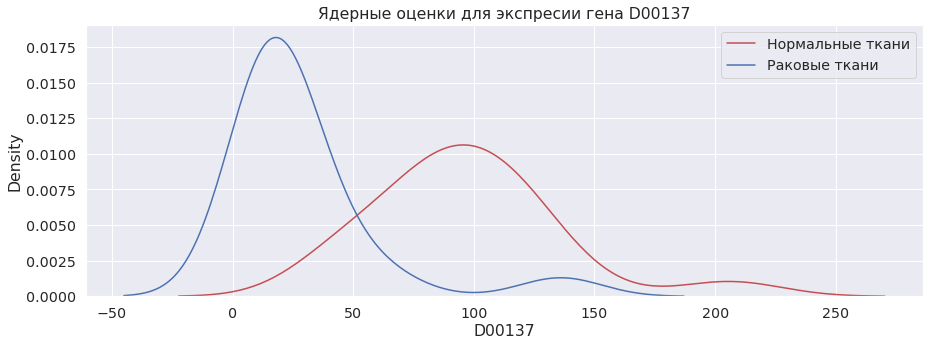

In [50]:
plt.figure(figsize=(15, 5))

sns.distplot(expr_data[(expr_data['Label']== 1)]['D00137'], label="Нормальные ткани", kde=True, hist=False, color="r")

sns.distplot(expr_data[(expr_data['Label']== -1)]['D00137'], label="Раковые ткани", kde=True, hist=False, color="b")
plt.legend()
plt.title('Ядерные оценки для экспресии гена D00137')
plt.show()

В анализе данных также часто применяется простой визуальный метод сравнения распределений: boxplot или ящик с усами.  На  графике ящика с усами в наглядном виде указана медиана выборки, выборочные квантили уровня 25% и 75%, а также потенциальные выбросы:


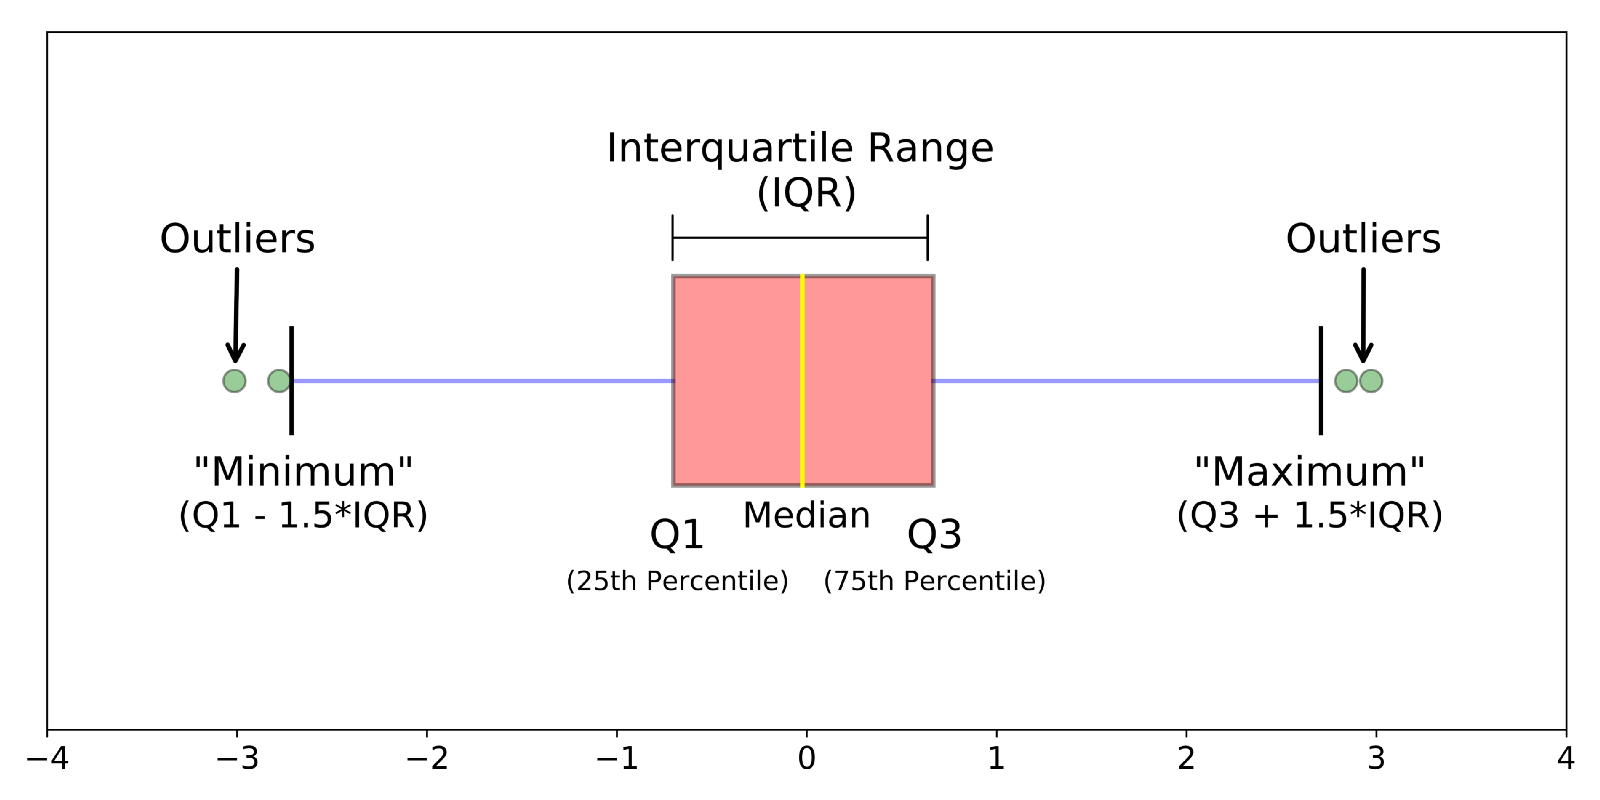

Постройте ящик с усами для гена `D00137`   , так чтобы по оси x был параметр `Label`, а по оси y &mdash; значения экспрессии, т.е. свой ящик для нормальной и раковой тканей. Используйте функцию `sns.boxplot`.

In [51]:
df_D00137 = pd.concat([expr_data[expr_data.Label==1].loc[:, ['D00137', 'Label']], 
                     expr_data[expr_data.Label==-1].loc[:, ['D00137', 'Label']]])

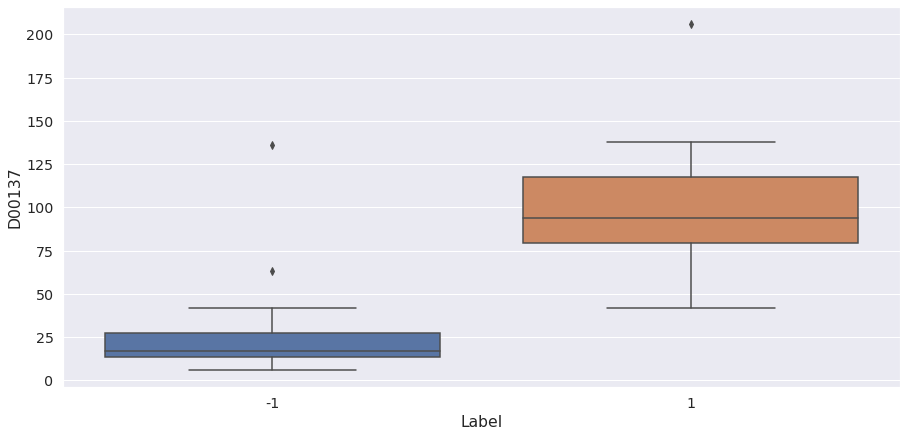

In [52]:
plt.figure(figsize=(15, 7))
sns.boxplot(y=df_D00137['D00137'], x=df_D00137['Label'])
plt.show()

Постройте аналогичные графики, используя `seaborn.violinplot` , популярную модификацию boxplot-а.

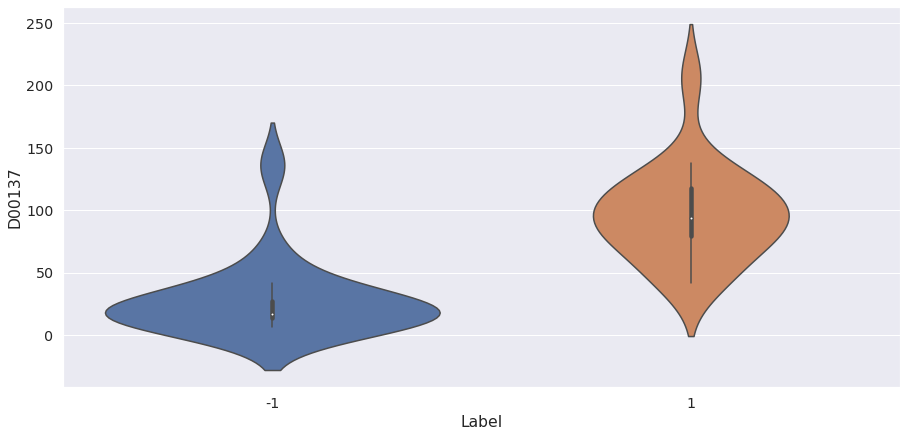

In [53]:
plt.figure(figsize=(15, 7))
sns.violinplot(y=df_D00137['D00137'], x=df_D00137['Label'])
plt.show()

Как устроен violinplot ? Какой способ визуализации кажется вам более информативным? Почему?

Белая точка -- медиана, толстая линия внутри -- четверть квантильный интервал, тонкая линия соответствует синей линии на картинке выше про boxplot. Сама скрипка, как мне кажется, что-то типо импирической плотности.

Эти два способа одинаково информативны, однако выбросы легче заметить на violinplot, но медиана видна чуть хуже.

На графиках видно, что для одного случайного гена профили экспрессии возможно различаются.  
Но насколько это статистически достоверно и такова ли эта картина в целом?   
  
  
Для продолжения анализа необходимо понять, как именно были получены данные. Для этого обратимся к статье:  
_Gene intensity information was converted to a mean intensity for each gene by proprietary software (Affymetrix), which includes routines for filtering and centering the data (in these experiments, to 50 intensity units). Expression of genes related to smooth muscle and connective tissue was consistently greater in the normal than the tumor samples, probably because of the greater heterogeneity of tissue type in the normal samples_

Видим, что нормализация данных уже выполнена.
Во многих случаях для визуализации удобно переходить к логарифмическому формату данных.

Предварительный зрительный анализ может сказать очень многое о том, как устроены наши данные. Тем не менее, для получения полной картины простого взгляда на данные недостаточно. Первое на что нужно обрать внимание &mdash; это параметры распределения. Все распределения в первую очередь характеризуются медианой и средним. Для гена `D00137` вычислите медиану и средний уровень экспрессии в опухолевых и нормальных тканей.

In [54]:
med_norm_tis = np.median(df_D00137[df_D00137['Label']==1]['D00137'])
mean_norm_tis = np.mean(df_D00137[df_D00137['Label']==1]['D00137'])

med_tum_tis = np.median(df_D00137[df_D00137['Label']==-1]['D00137'])
mean_tum_tis = np.mean(df_D00137[df_D00137['Label']==-1]['D00137'])

print("Нормальная ткань. Медиана: " + str(med_norm_tis) + ' Среднее: '+ str(mean_norm_tis) +'\n')

print("Опухолевая ткань. Медиана: " + str(med_tum_tis) + ' Среднее: '+ str(mean_tum_tis) +'\n')

Нормальная ткань. Медиана: 94.0 Среднее: 97.0

Опухолевая ткань. Медиана: 17.0 Среднее: 28.166666666666668



Для того, чтобы утверждать, что "ген `X` овер-экспрессирован в опухолевых образцах", недостаточно просто посмотреть на боксплоты, необходимо провести статистический анализ.

Для анализ одного гена проверяются гипотезы о сравнении профилей экспрессий между опухолевыми и контрольными образцами:  
   $\mathsf{H}_0\colon$ для гена `X` не наблюдается разницы средних экспрессий;  
   $\mathsf{H}_1\colon$ для гена `X` наблюдается разница средних экспрессий.
    
Какой критерий стоит выбрать для проверки в предположении нормальности распределений? Воспользуйтесь этим критерием для проверки гипотезы для гена `Human class I alcohol dehydrogenase beta-1 subunit, allele 1 mRNA, complete cds` (см. столбец `Description`).

In [55]:
data[data['Description']=='"Human class I alcohol dehydrogenase beta-1 subunit, allele 1 mRNA, complete cds"']

Description  Tumor 27  \
Accession Number                                                                
D00137            "Human class I alcohol dehydrogenase beta-1 su...      18.0   

                  Tumor 29  Tumor 34  Tumor 28  Tumor 35  Tumor 8  Tumor 3  \
Accession Number                                                             
D00137                13.0      11.0      28.0       6.0     63.0     26.0   

                  Tumor 9  Tumor 4  ...  Normal 32  Normal 39  Normal 10  \
Accession Number                    ...                                    
D00137              136.0     26.0  ...      138.0      118.0       92.0   

                  Normal 33  Normal 5  Normal 11  Normal 6  Normal 12  \
Accession Number                                                        
D00137                 96.0      50.0       85.0      79.0       81.0   

                  Normal 40  mean_expr  
Accession Number                        
D00137                206.0  58.485714  

[1 rows x 38 columns]

In [56]:
norm_sampl = df_D00137[df_D00137['Label'] == 1]['D00137'].to_numpy()
tum_sampl = df_D00137[df_D00137['Label'] == -1]['D00137'].to_numpy()

sps.ttest_ind(norm_sampl, tum_sampl, equal_var=False)

Ttest_indResult(statistic=5.985803078987308, pvalue=1.0869056401678417e-06)

Примечание.

Интересно, что если мы начнём проверять, а действительно ли выборки из нормального распределения то окажется, что данные для опухолей все же не из нормального распределения...

In [57]:
## Проверка с помощью Лиллиефорса, Шапиро-Уилка и Жарка-Бера
from statsmodels.stats.diagnostic import lilliefors

p_vals_corr = multipletests([sps.shapiro(norm_sampl)[1], sps.jarque_bera(norm_sampl)[1], lilliefors(norm_sampl, dist='norm')[1]
               , sps.shapiro(tum_sampl)[1], sps.jarque_bera(tum_sampl)[1], 
                  lilliefors(tum_sampl, dist='norm')[1]],alpha=0.05, method='holm')[1]

In [58]:
print("Скорректированные p-value для Normal: " + str(p_vals_corr[:3]))
print("Скорректированные p-value для Tumor: " + str(p_vals_corr[3:]))

Скорректированные p-value для Normal: [0.16660087 0.15804214 0.18240135]
Скорректированные p-value для Tumor: [6.76177660e-05 4.86943819e-13 4.00000000e-03]


Проинтерпретируйте результаты:

Да, действительно, гипотеза о равенстве средний уверенно отвергается в предположении, что данные имеют нормальное распределение (что соответсвует тому, что выборочные средние имеют сильно разное значение и графики ядерных оценок сильно отличаются).

Давайте проверим, что наши данные действительно разделяются на два разных распределения. Для этого проверим, как будет работать этот же метод, если случайным образом перемешать метки подгрупп. Реализуйте случайное сэмплирование с помощью функции `random.choice` из библиотеки `numpy` и посмотрите, как изменится p-value (и изменится ли).

In [59]:
sampled_data_1 = np.random.choice(df_D00137['D00137'].to_numpy(), size=18, replace=False)
sampled_data_2 = np.random.choice(df_D00137['D00137'].to_numpy(), size=18, replace=False)
p_val = sps.ttest_ind(sampled_data_1, sampled_data_2, equal_var=False)[1]

print("p-value: " + str(p_val)+'\n')

p-value: 0.6977134841572437



Сделайте вывод

Гипотеза о равенстве средних не отвергается почти всегда, следовательно мы имеем 2 выборки у которых совпадают средние. Так как до сэмплирования они не совпадали, то мы действиетельно имеем два разных распределения.

И, наконец, самое интересное. Посчитайте, в каком проценте генов, для которых с уровнем значимости 0.05 наблюдается овер-экспрессия в опухолевых тканях. При этом важно выполнить поправку на множественное тестирование.

Сначала выполним несколько учебных заданий. 

а*) Реализуйте критерий, который вы использовали в предыдущем пункте, самостоятельно. 

In [60]:
def T_student(x, y):
    n, m = len(x), len(y)
    x = np.array(x)
    y = np.array(y)
    S_x = ((x**2).mean() - x.mean()**2)/(n-1)*n
    S_y = ((y**2).mean() - y.mean()**2)/(m-1)*m
    
    statistic = np.abs(x.mean() - y.mean()) / np.sqrt(S_x / n + S_y / m)
    v = (S_x / n + S_y / n)**2 / (S_x**2 / (n*n * (n-1)) + S_y**2 /(m*m * (m-1)) )
    p_val = 2*sps.t.sf(statistic, df=v)
    return statistic, p_val

б) Реализуйте поправку Бонферрони (метод Бонферрони) самостоятельно. Функция должна возвращать результаты отвержения гипотез и скорректированные p-value.

In [61]:
def MPG_bonferroni(p_vals, alpha=0.05):
    p_vals_corrected = np.array(p_vals) * len(p_vals)
    for i in range(len(p_vals_corrected)):
        if p_vals_corrected[i] > 1:
            p_vals_corrected[i] = 1
    
    #p_vals_corrected = 1 if p_vals_corrected > 1 else p_vals_corrected
    is_rej = p_vals_corrected < alpha
    return is_rej, p_vals_corrected 

In [62]:
expr_data.head()

Accession Number  BioB  BioC   BioD  D00003  D00015  D00102  D00137  D00173  \
Tumor 27          -2.0  12.0  107.0     2.0    26.0     5.0    18.0     1.0   
Tumor 29         -11.0   9.0   65.0     7.0    13.0     2.0    13.0     5.0   
Tumor 34         -17.0  17.0  108.0     1.0    13.0     0.0    11.0    10.0   
Tumor 28          -1.0  18.0   95.0    -3.0     9.0    10.0    28.0     8.0   
Tumor 35         -14.0  10.0   94.0     0.0     2.0    -5.0     6.0    10.0   

Accession Number  D00265  D00306  ...  Z50753  Z50788  b-actin-3  b-actin-5  \
Tumor 27           153.0    -7.0  ...    35.0    -1.0      797.0      559.0   
Tumor 29           145.0    -7.0  ...    26.0     3.0     1298.0      409.0   
Tumor 34           132.0    -6.0  ...    25.0     1.0      862.0      667.0   
Tumor 28            73.0   -17.0  ...    41.0    -2.0     1047.0      643.0   
Tumor 35           184.0    10.0  ...    29.0     2.0     1253.0      437.0   

Accession Number  b-actin-M    cre  gapdh-3  gapdh-5  gapdh-M  Label  
Tumor 27              849.0  246.0   1214.0    676.0    873.0     -1  
Tumor 29             1093.0  414.0   1394.0    477.0    609.0     -1  
Tumor 34              961.0  449.0   1252.0    635.0    754.0     -1  
Tumor 28             1100.0  369.0   1313.0    785.0   1013.0     -1  
Tumor 35              844.0  345.0   1292.0    497.0    669.0     -1  

[5 rows x 6605 columns]

в) Проведите МПГ с использованием вашей реализации и с использованием реализации критерия из scipy и МПГ из statsmodels. В случае, если вы не выполняли пункт а), используйте только вашу реализацию пункта б). Сравните результаты.

In [63]:
p_vals_my = []
p_vals_sps = []
proteins = expr_data.columns[:-1]

for item in proteins:
    norm_sampl = expr_data[expr_data['Label'] == 1][item].to_numpy()
    tum_sampl = expr_data[expr_data['Label'] == -1][item].to_numpy()

    p_vals_my.append(T_student(norm_sampl, tum_sampl)[1])
    p_vals_sps.append(sps.ttest_ind(norm_sampl, tum_sampl, equal_var=False)[1])
    
    
df_result = pd.DataFrame()

df_result['p-value. Моя реализация'] = p_vals_my
df_result['Отвергнута.Мой метод Бонферрони'], df_result['Скорректированные p-value. Мой метод Бонферрони'] =  MPG_bonferroni(p_vals_my)

df_result['p-value. Scipy реализация'] = p_vals_sps
df_result['Отвергнута.Statsmodels метод Бонферрони'], df_result['Скорректированные p-value. Statsmodels метод Бонферрони'] =  multipletests(p_vals_sps, method='bonferroni')[:2]


for i in range(len(proteins)):
    df_result = df_result.rename(index={i: proteins[i]})

df_result.T

BioB      BioC  \
p-value. Моя реализация                             0.792504  0.804071   
Отвергнута.Мой метод Бонферрони                        False     False   
Скорректированные p-value. Мой метод Бонферрони          1.0       1.0   
p-value. Scipy реализация                           0.792504  0.804071   
Отвергнута.Statsmodels метод Бонферрони                False     False   
Скорректированные p-value. Statsmodels метод Бо...       1.0       1.0   

                                                       BioD   D00003  \
p-value. Моя реализация                             0.74589  0.27491   
Отвергнута.Мой метод Бонферрони                       False    False   
Скорректированные p-value. Мой метод Бонферрони         1.0      1.0   
p-value. Scipy реализация                           0.74589  0.27491   
Отвергнута.Statsmodels метод Бонферрони               False    False   
Скорректированные p-value. Statsmodels метод Бо...      1.0      1.0   

                                                      D00015    D00102  \
p-value. Моя реализация                             0.000023  0.506411   
Отвергнута.Мой метод Бонферрони                        False     False   
Скорректированные p-value. Мой метод Бонферрони     0.151473       1.0   
p-value. Scipy реализация                           0.000023  0.506411   
Отвергнута.Statsmodels метод Бонферрони                False     False   
Скорректированные p-value. Statsmodels метод Бо...  0.151473       1.0   

                                                      D00137    D00173  \
p-value. Моя реализация                             0.000001  0.216386   
Отвергнута.Мой метод Бонферрони                         True     False   
Скорректированные p-value. Мой метод Бонферрони     0.007178       1.0   
p-value. Scipy реализация                           0.000001  0.216386   
Отвергнута.Statsmodels метод Бонферрони                 True     False   
Скорректированные p-value. Statsmodels метод Бо...  0.007178       1.0   

                                                      D00265    D00306  ...  \
p-value. Моя реализация                             0.963818  0.000645  ...   
Отвергнута.Мой метод Бонферрони                        False     False  ...   
Скорректированные p-value. Мой метод Бонферрони          1.0       1.0  ...   
p-value. Scipy реализация                           0.963818  0.000645  ...   
Отвергнута.Statsmodels метод Бонферрони                False     False  ...   
Скорректированные p-value. Statsmodels метод Бо...       1.0       1.0  ...   

                                                     Z50194    Z50753  \
p-value. Моя реализация                             0.01563  0.000035   
Отвергнута.Мой метод Бонферрони                       False     False   
Скорректированные p-value. Мой метод Бонферрони         1.0  0.232934   
p-value. Scipy реализация                           0.01563  0.000035   
Отвергнута.Statsmodels метод Бонферрони               False     False   
Скорректированные p-value. Statsmodels метод Бо...      1.0  0.232934   

                                                      Z50788 b-actin-3  \
p-value. Моя реализация                             0.164901  0.038089   
Отвергнута.Мой метод Бонферрони                        False     False   
Скорректированные p-value. Мой метод Бонферрони          1.0       1.0   
p-value. Scipy реализация                           0.164901  0.038089   
Отвергнута.Statsmodels метод Бонферрони                False     False   
Скорректированные p-value. Statsmodels метод Бо...       1.0       1.0   

                                                   b-actin-5 b-actin-M  \
p-value. Моя реализация                             0.000505  0.000017   
Отвергнута.Мой метод Бонферрони                        False     False   
Скорректированные p-value. Мой метод Бонферрони          1.0  0.108989   
p-value. Scipy реализация                           0.000505  0.000017   
Отвергнута.Statsmodels метод Бонферрони

Результаты одинаковые, следовательно критерий и метод Бонферонни реализованы правильно.

Попробуем сравнить их более строго.

In [71]:
diff = (df_result['Скорректированные p-value. Мой метод Бонферрони'].to_numpy() -  df_result['Скорректированные p-value. Statsmodels метод Бонферрони'].to_numpy())
print(diff.shape[0])
(diff<10**(-10)).sum()

6604


6604

Как видим p-value с точность до 10-го знака равны.

Какие методы контроля FWER можно использовать в данной задаче? Сделайте проверку с использованием наилучшего (наиболее мощного) возможного метода. Используйте стандартные реализации.

In [72]:
# Можно использовать любые методы контроля FWER. Ибо выборки независимы
df_result['Отвергнута. Метод Шидака-Холма'], df_result['Скорректированные p-value. Метод Шидака-Холма'] = multipletests(df_result['p-value. Scipy реализация'].to_numpy(), alpha=0.05, method='holm-sidak')[:2]

df_result.T

BioB      BioC  \
p-value. Моя реализация                             0.792504  0.804071   
Отвергнута.Мой метод Бонферрони                        False     False   
Скорректированные p-value. Мой метод Бонферрони          1.0       1.0   
p-value. Scipy реализация                           0.792504  0.804071   
Отвергнута.Statsmodels метод Бонферрони                False     False   
Скорректированные p-value. Statsmodels метод Бо...       1.0       1.0   
Отвергнута. Метод Шидака-Холма                         False     False   
Скорректированные p-value. Метод Шидака-Холма            1.0       1.0   

                                                       BioD   D00003  \
p-value. Моя реализация                             0.74589  0.27491   
Отвергнута.Мой метод Бонферрони                       False    False   
Скорректированные p-value. Мой метод Бонферрони         1.0      1.0   
p-value. Scipy реализация                           0.74589  0.27491   
Отвергнута.Statsmodels метод Бонферрони               False    False   
Скорректированные p-value. Statsmodels метод Бо...      1.0      1.0   
Отвергнута. Метод Шидака-Холма                        False    False   
Скорректированные p-value. Метод Шидака-Холма           1.0      1.0   

                                                      D00015    D00102  \
p-value. Моя реализация                             0.000023  0.506411   
Отвергнута.Мой метод Бонферрони                        False     False   
Скорректированные p-value. Мой метод Бонферрони     0.151473       1.0   
p-value. Scipy реализация                           0.000023  0.506411   
Отвергнута.Statsmodels метод Бонферрони                False     False   
Скорректированные p-value. Statsmodels метод Бо...  0.151473       1.0   
Отвергнута. Метод Шидака-Холма                         False     False   
Скорректированные p-value. Метод Шидака-Холма       0.137599       1.0   

                                                      D00137    D00173  \
p-value. Моя реализация                             0.000001  0.216386   
Отвергнута.Мой метод Бонферрони                         True     False   
Скорректированные p-value. Мой метод Бонферрони     0.007178       1.0   
p-value. Scipy реализация                           0.000001  0.216386   
Отвергнута.Statsmodels метод Бонферрони                 True     False   
Скорректированные p-value. Statsmodels метод Бо...  0.007178       1.0   
Отвергнута. Метод Шидака-Холма                          True     False   
Скорректированные p-value. Метод Шидака-Холма       0.007094       1.0   

                                                      D00265    D00306  ...  \
p-value. Моя реализация                             0.963818  0.000645  ...   
Отвергнута.Мой метод Бонферрони                        False     False  ...   
Скорректированные p-value. Мой метод Бонферрони          1.0       1.0  ...   
p-value. Scipy реализация                           0.963818  0.000645  ...   
Отвергнута.Statsmodels метод Бонферрони                False     False  ...   
Скорректированные p-value. Statsmodels метод Бо...       1.0       1.0  ...   
Отвергнута. Метод Шидака-Холма                         False     False  ...   
Скорректированные p-value. Метод Шидака-Холма            1.0  0.981852  ...   

                                                     Z50194    Z50753  \
p-value. Моя реализация                             0.01563  0.000035   
Отвергнута.Мой метод Бонферрони                       False     False   
Скорректированные p-value. Мой метод Бонферрони         1.0  0.232934   
p-value. Scipy реализация                           0.01563  0.000035   
Отвергнута.Statsmodels метод Бонферрони               False     False   
Скорректированные p-value. Statsmodels метод Бо...      1.0  0.232934   
Отвергнута. Метод Шидака-Холма                        False     False   
Скорректированные p-value. Метод Шидака-Холма           1.0  0.202892   

                                    

Далее используйте результаты последней проверки (с использованием наилучшего метода). Постройте гистограмму полученных значений p-value и скорректированных.

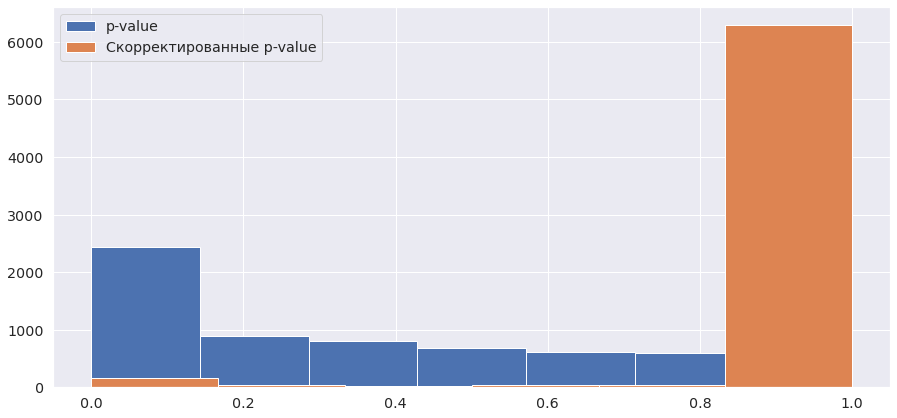

In [73]:
plt.figure(figsize=(15, 7))

plt.hist(df_result['p-value. Scipy реализация'].to_numpy(), bins=7, label='p-value')
plt.hist(df_result['Скорректированные p-value. Метод Шидака-Холма'].to_numpy(), bins=6, label='Скорректированные p-value')

plt.legend()
plt.show()

Напечатайте число генов, для которых можно отвергнуть нулевую гипотезу, а также их долю среди всех генов.

In [74]:
print('Генов которые отвергают нулевую гипотезу: ' + str(df_result[df_result['Отвергнута. Метод Шидака-Холма'] == True].shape[0]) + '.\n')

print('Доля отвергнутых: ' + str(df_result[df_result['Отвергнута. Метод Шидака-Холма'] == True].shape[0]/ df_result.shape[0]))

Генов которые отвергают нулевую гипотезу: 109.

Доля отвергнутых: 0.016505148394912173


Посмотрим, какие же гены оверэкспрессированы. В коде ниже `p_vals_adjusted` &mdash; скорректированные значения p-value.

In [75]:
p_vals_adjusted = df_result['Скорректированные p-value. Метод Шидака-Холма'].to_numpy()

In [76]:
for name, function in zip(
    expr_data.columns[np.where([p_vals_adjusted < 0.05])[1]], 
    descr[np.where([p_vals_adjusted < 0.05])[1]]
):
    print(name + ": " + function)

D00137: "Human class I alcohol dehydrogenase beta-1 subunit, allele 1 mRNA, complete cds"
D14678: "Human mRNA for kinesin-related protein, partial cds"
D31766: "Human mRNA for KIAA0060 gene, complete cds"
D31885: "Human mRNA for KIAA0069 gene, partial cds"
D42047: "Human mRNA for KIAA0089 gene, partial cds"
D63874: "Human mRNA for HMG-1, complete cds"
H01420: yi99d09.s1 Homo sapiens cDNA clone 147377 3' similar to gb:M68840 AMINE OXIDASE (HUMAN);
H06524: "yl78h01.s1 Homo sapiens cDNA clone 44386 3' similar to gb:X04412 GELSOLIN PRECURSOR, PLASMA (HUMAN);"
H09351: yl95g07.s1 Homo sapiens cDNA clone 46019 3' similar to gb:D28480 MCM3 HOMOLOG (HUMAN);
H20709: "yn63h10.s1 Homo sapiens cDNA clone 173155 3' similar to gb:M22918 MYOSIN LIGHT CHAIN ALKALI, SMOOTH-MUSCLE ISOFORM (HUMAN);"
H23544: ym53b03.s1 Homo sapiens cDNA clone 51894 3' similar to gb:M31469 GTP-BINDING NUCLEAR PROTEIN RAN (HUMAN);
H24030: ym49h04.s1 Homo sapiens cDNA clone 51695 3' similar to SP:S40237 S40237 CHAPERONIN - ;
